# Increasing Operational Efficiency and Profits Through Coffee Shop Sales Analysis Using SQL

## About Dataset

The dataset covers sales activities within a local coffee shop, encompassing a range of information such as transaction records and product details. By analyzing this data using SQL queries and data analysis techniques, we aim to uncover valuable insights that can inform decision-making and drive business growth.

### 1. Overview of the Dataset

The dataset is divided into three tables, with each column labeled according to its function. The following sections provide an overview of each table's structure as well as an entity-relationship diagram of the three tables. To enhance visualization, we using Python's Pandas package.

In [3]:
import pandas as pd
import psycopg2 as ps
import matplotlib.pyplot as plt

In [4]:
#Import dataset
coffeshope_transaction = pd.read_csv('coffeshope_transaction.csv')
coffeshope_product = pd.read_csv('coffeshope_product.csv')
coffeshope_timedetail = pd.read_csv('coffeshope_timedetail.csv')

In [27]:
#Basic information dataset coffeshope_transaction
coffeshope_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   transaction_id    149116 non-null  int64 
 1   transaction_date  149116 non-null  object
 2   transaction_time  149116 non-null  object
 3   store_id          149116 non-null  int64 
 4   store_location    149116 non-null  object
 5   product_id        149116 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 6.8+ MB


In [28]:
#Structure information dataset coffeshope_transaction
coffeshope_transaction.head()

transaction_id transaction_date transaction_time  store_id store_location  \
0          114301       01-06-2023         11:33:29         3        Astoria   
1          115405       02-06-2023         11:18:24         3        Astoria   
2          115478       02-06-2023         12:02:45         3        Astoria   
3          116288       02-06-2023         19:39:47         3        Astoria   
4          116714       03-06-2023         12:24:57         3        Astoria   

   product_id  
0          45  
1          45  
2          45  
3          45  
4          45

In [29]:
#Basic information dataset coffeshope_product
coffeshope_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_qty   149116 non-null  int64  
 2   unit_price        149116 non-null  float64
 3   Total_Bill        149116 non-null  float64
 4   product_category  149116 non-null  object 
 5   product_type      149116 non-null  object 
 6   product_detail    149116 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 8.0+ MB


In [30]:
#Structure information dataset coffeshope_product
coffeshope_product.head()

transaction_id  transaction_qty  unit_price  Total_Bill product_category  \
0          114301                1         3.0         3.0              Tea   
1          115405                1         3.0         3.0              Tea   
2          115478                1         3.0         3.0              Tea   
3          116288                1         3.0         3.0              Tea   
4          116714                1         3.0         3.0              Tea   

        product_type product_detail  
0  Brewed herbal tea     Peppermint  
1  Brewed herbal tea     Peppermint  
2  Brewed herbal tea     Peppermint  
3  Brewed herbal tea     Peppermint  
4  Brewed herbal tea     Peppermint

In [31]:
#Basic information dataset coffeshope_timedetail
coffeshope_timedetail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   transaction_id  149116 non-null  int64 
 1   Month Name      149116 non-null  object
 2   Day Name        149116 non-null  object
 3   Hour            149116 non-null  int64 
 4   Month           149116 non-null  int64 
 5   Day of Week     149116 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 6.8+ MB


In [32]:
#Structure information dataset coffeshope_timedetail
coffeshope_timedetail.head()

transaction_id Month Name  Day Name  Hour  Month  Day of Week
0          114301       June  Thursday    11      6            3
1          115405       June    Friday    11      6            4
2          115478       June    Friday    12      6            4
3          116288       June    Friday    19      6            4
4          116714       June  Saturday    12      6            5

# Trends and Patterns

In [5]:
#Connect postgresql to jupyter
pga_coffeshop = ps.connect(dbname='coffeshop',
                           user='postgres',
                           password='',
                           host='localhost',
                           port='5432')

### 1. Menu item trends

In [145]:
#Popular drink item on the menu
query_drinkitem = """SELECT product_detail, SUM(CAST(total_bill AS NUMERIC)) AS total_profit
FROM coffeshop_product
WHERE product_category LIKE '%Coffee%' 
OR product_category LIKE '%Tea%'
OR product_category LIKE '%Drink%'
OR product_category LIKE '%Flavours'
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [146]:
#Read sql code for drink item filter
drink_trends = pd.read_sql_query(query_drinkitem, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\2886001651.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  drink_trends = pd.read_sql_query(query_drinkitem, pga_coffeshop)


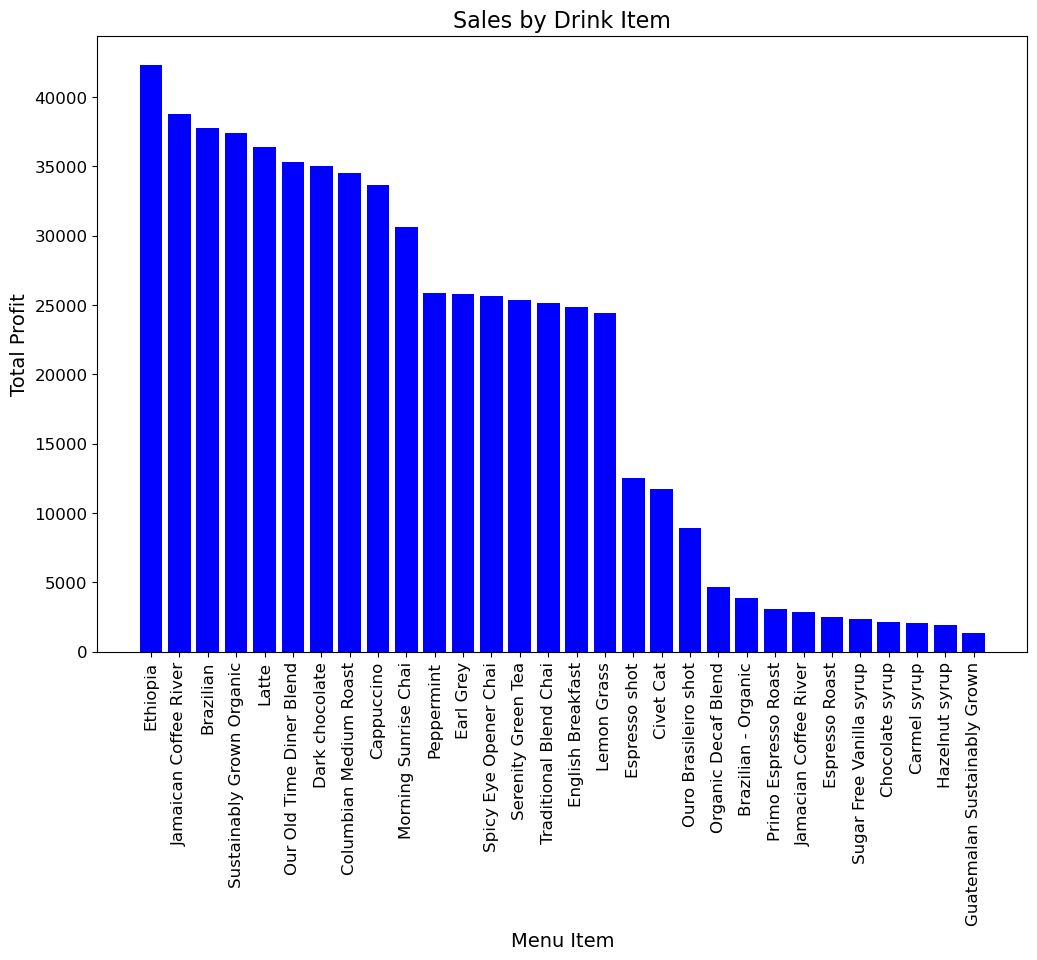

In [147]:
#Plot graph from table popular drink item on the menu
plt.figure(figsize=(12, 8))
plt.bar(drink_trends['product_detail'], drink_trends['total_profit'], color='blue')

plt.title('Sales by Drink Item', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [142]:
#Popular food item on the menu
query_fooditem = """SELECT product_detail, SUM(CAST(total_bill AS NUMERIC)) AS total_profit
FROM coffeshop_product
WHERE product_category LIKE '%Bakery%' 
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [143]:
#Read sql code for food item filter
food_trends = pd.read_sql_query(query_fooditem, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\622470206.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  food_trends = pd.read_sql_query(query_fooditem, pga_coffeshop)


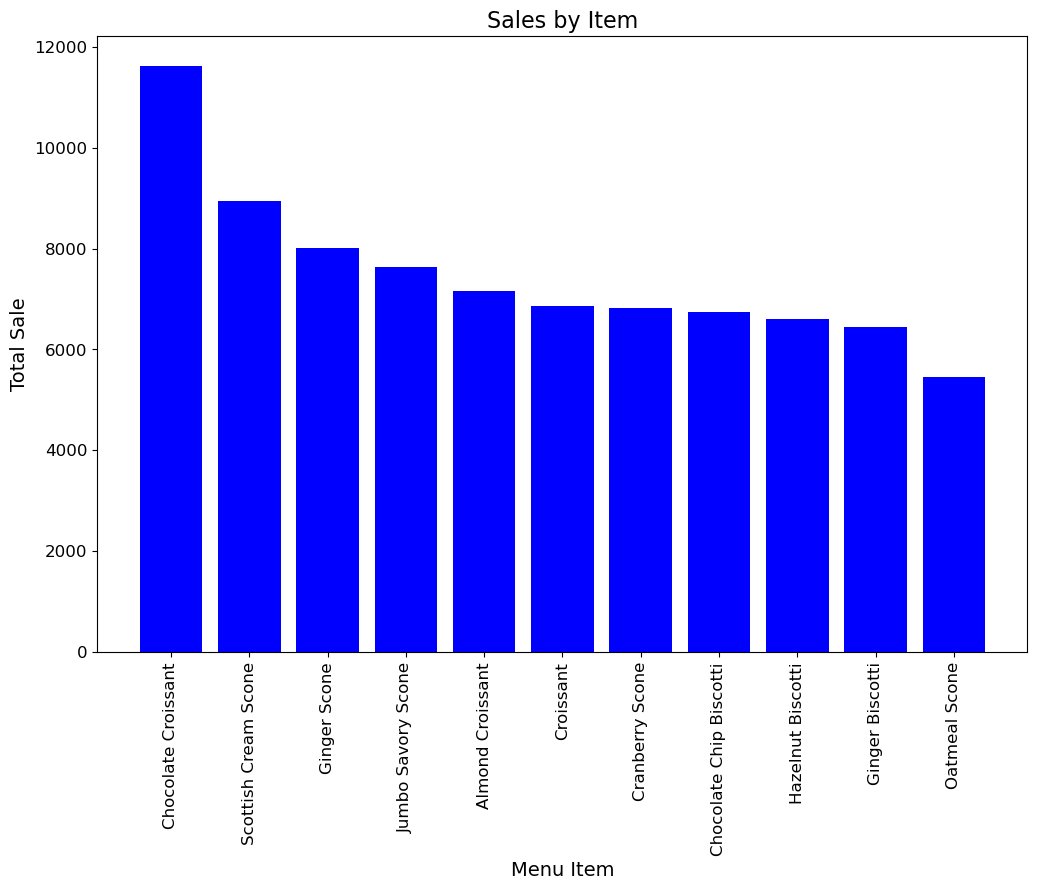

In [144]:
#Plot graph from table popular food item on the menu
plt.figure(figsize=(12, 8))
plt.bar(food_trends['product_detail'], food_trends['total_profit'], color='blue')

plt.title('Sales by Item', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### 2. Timeline trends

#### a. Trends by month

In [5]:
#Popular item menu in january
query_january = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE month_name IN ('January')
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [47]:
#Read sql code for january filter
january_trends = pd.read_sql_query(query_january, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\3770423570.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  january_trends = pd.read_sql_query(query_january, pga_coffeshop)


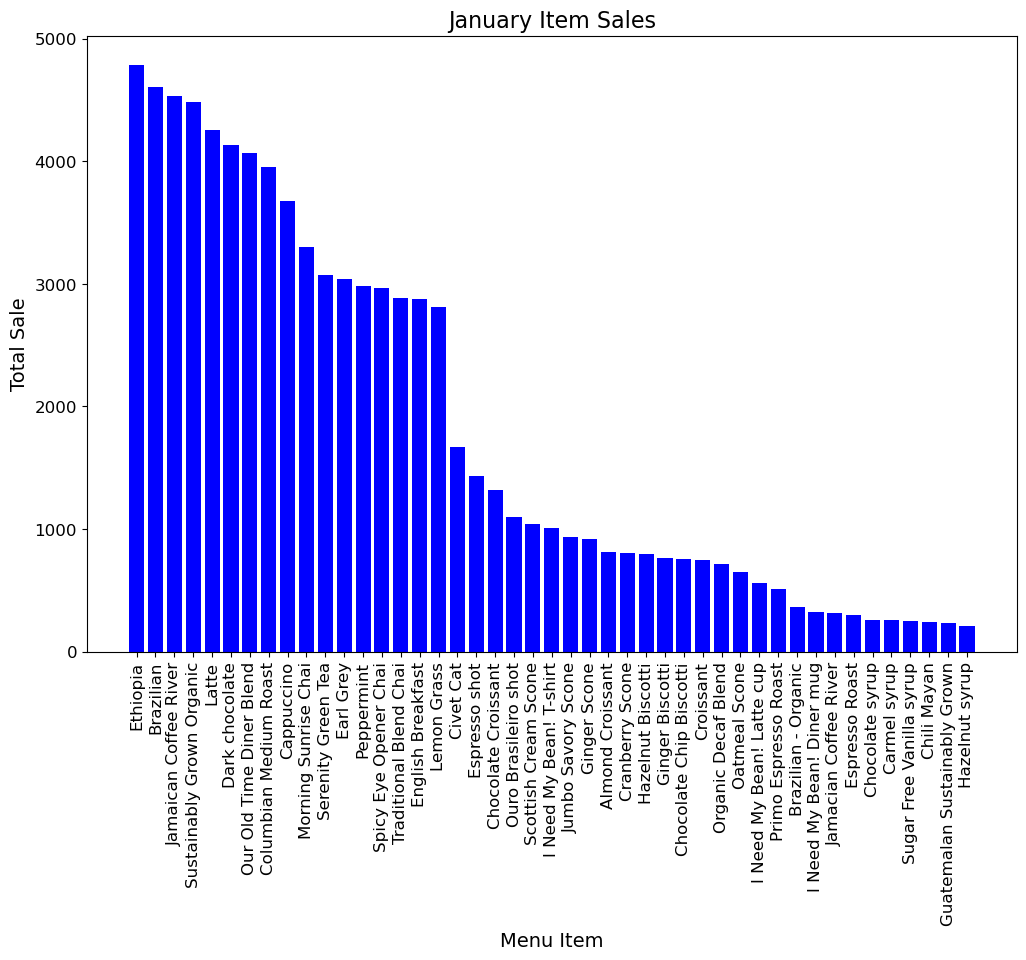

In [48]:
#Plot graph from table popular item menu in january
plt.figure(figsize=(12, 8))
plt.bar(january_trends['product_detail'], january_trends['total_profit'], color='blue')

plt.title('January Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [49]:
#Popular item menu in february
query_february = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE month_name IN ('February')
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [50]:
#Read sql code for february filter
february_trends = pd.read_sql_query(query_february, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\687763761.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  february_trends = pd.read_sql_query(query_february, pga_coffeshop)


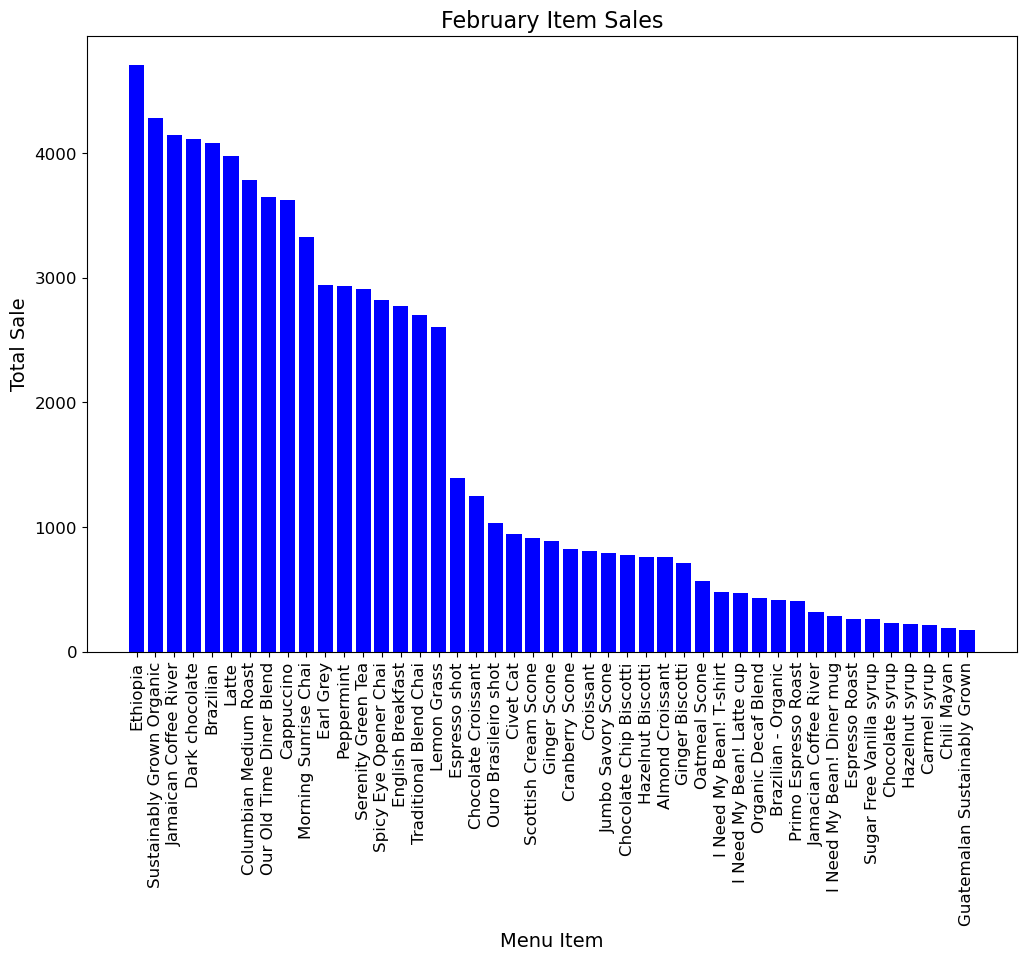

In [51]:
#Plot graph from table popular item menu in february
plt.figure(figsize=(12, 8))
plt.bar(february_trends['product_detail'], february_trends['total_profit'], color='blue')

plt.title('February Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [52]:
#Popular item menu in march
query_march = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE month_name IN ('January')
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [53]:
#Read sql code for march filter
march_trends = pd.read_sql_query(query_march, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\3877534211.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  march_trends = pd.read_sql_query(query_march, pga_coffeshop)


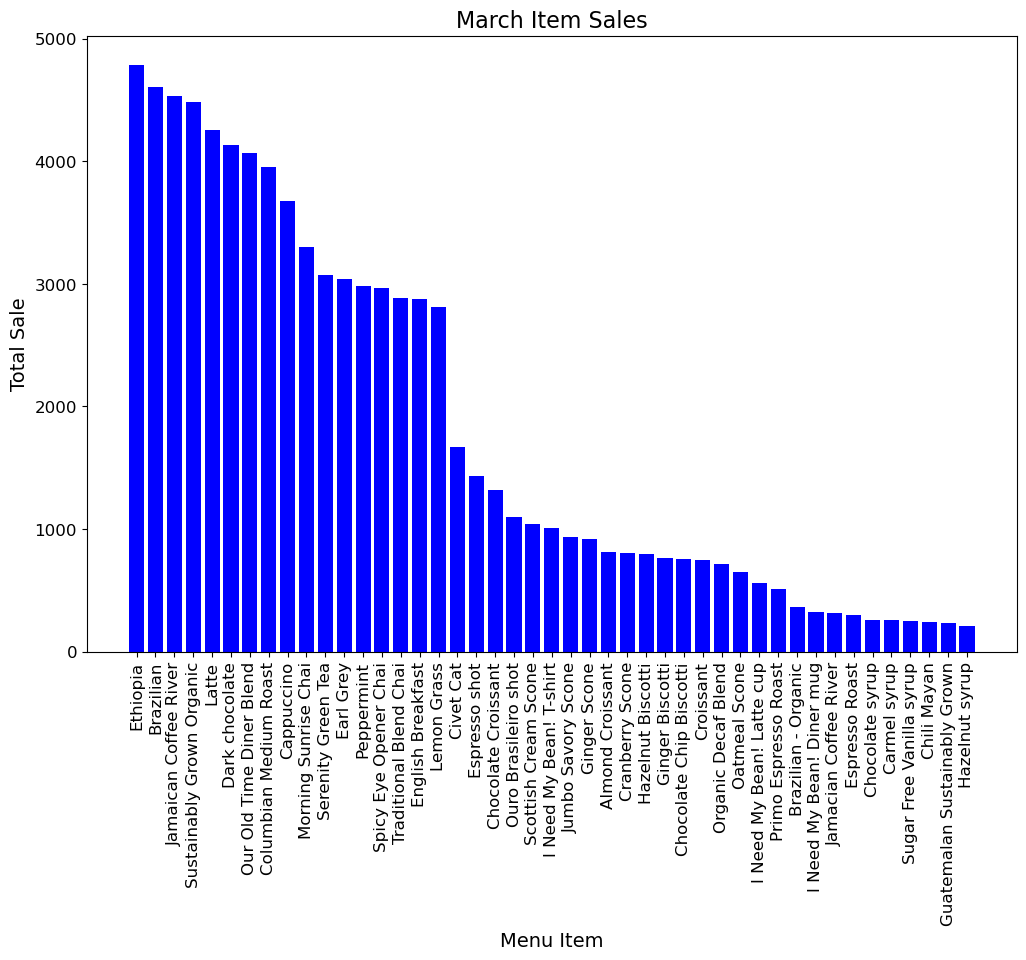

In [55]:
#Plot graph from table popular item menu in march
plt.figure(figsize=(12, 8))
plt.bar(march_trends['product_detail'], march_trends['total_profit'], color='blue')

plt.title('March Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [56]:
#Popular item menu in april
query_april = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE month_name IN ('April')
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [57]:
#Read sql code for april filter
april_trends = pd.read_sql_query(query_april, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\31636772.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  april_trends = pd.read_sql_query(query_april, pga_coffeshop)


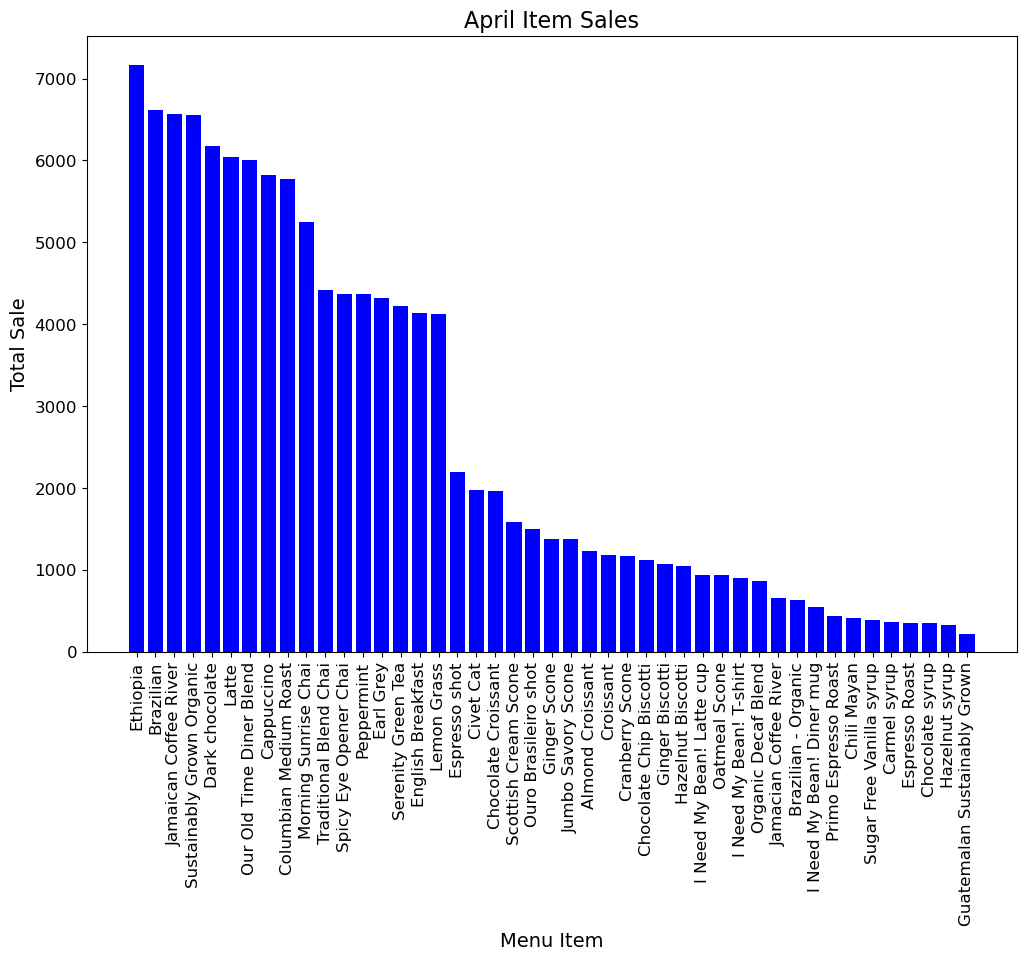

In [58]:
#Plot graph from table popular item menu in april
plt.figure(figsize=(12, 8))
plt.bar(april_trends['product_detail'], april_trends['total_profit'], color='blue')

plt.title('April Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [59]:
#Popular item menu in may
query_may = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE month_name IN ('May')
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [60]:
#Read sql code for may filter
may_trends = pd.read_sql_query(query_may, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\1037075910.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  may_trends = pd.read_sql_query(query_may, pga_coffeshop)


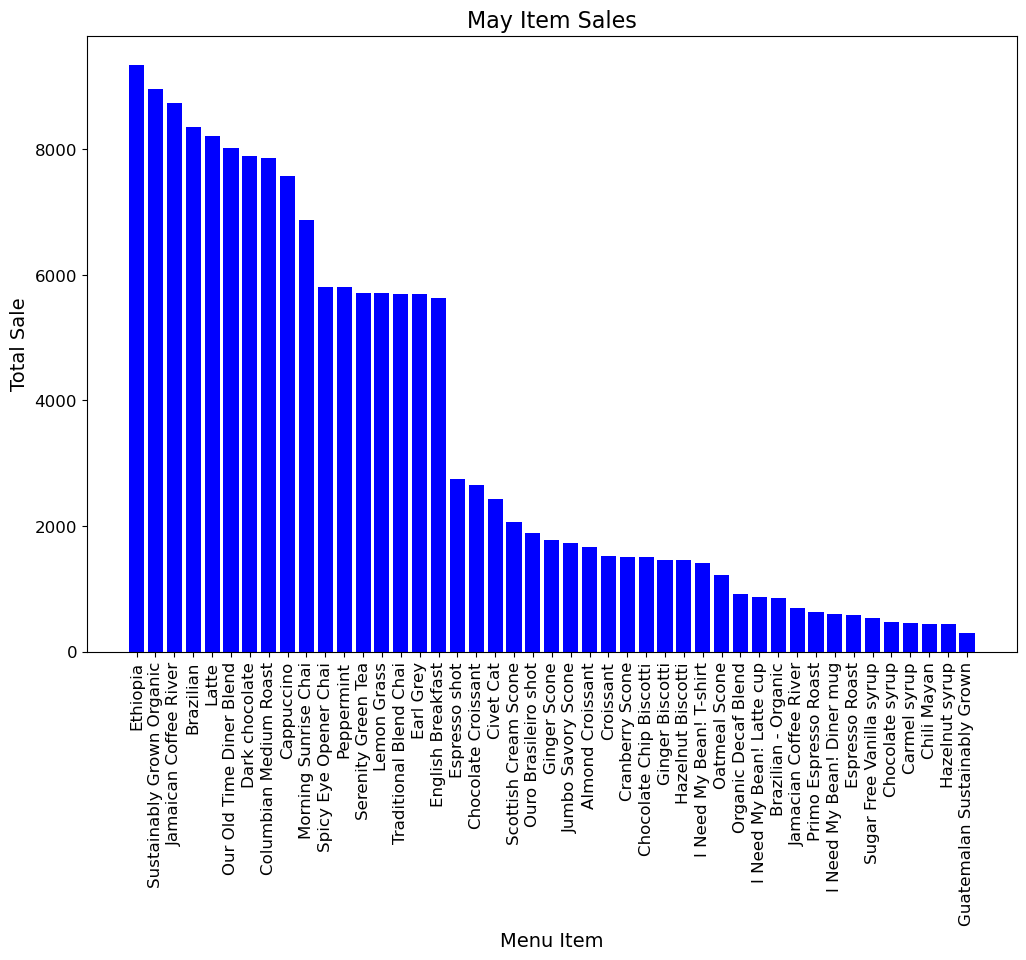

In [61]:
#Plot graph from table popular item menu in may
plt.figure(figsize=(12, 8))
plt.bar(may_trends['product_detail'], may_trends['total_profit'], color='blue')

plt.title('May Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [62]:
#Popular item menu in june
query_june = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE month_name IN ('June')
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [63]:
#Read sql code for june filter
june_trends = pd.read_sql_query(query_june, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\3148631641.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  june_trends = pd.read_sql_query(query_june, pga_coffeshop)


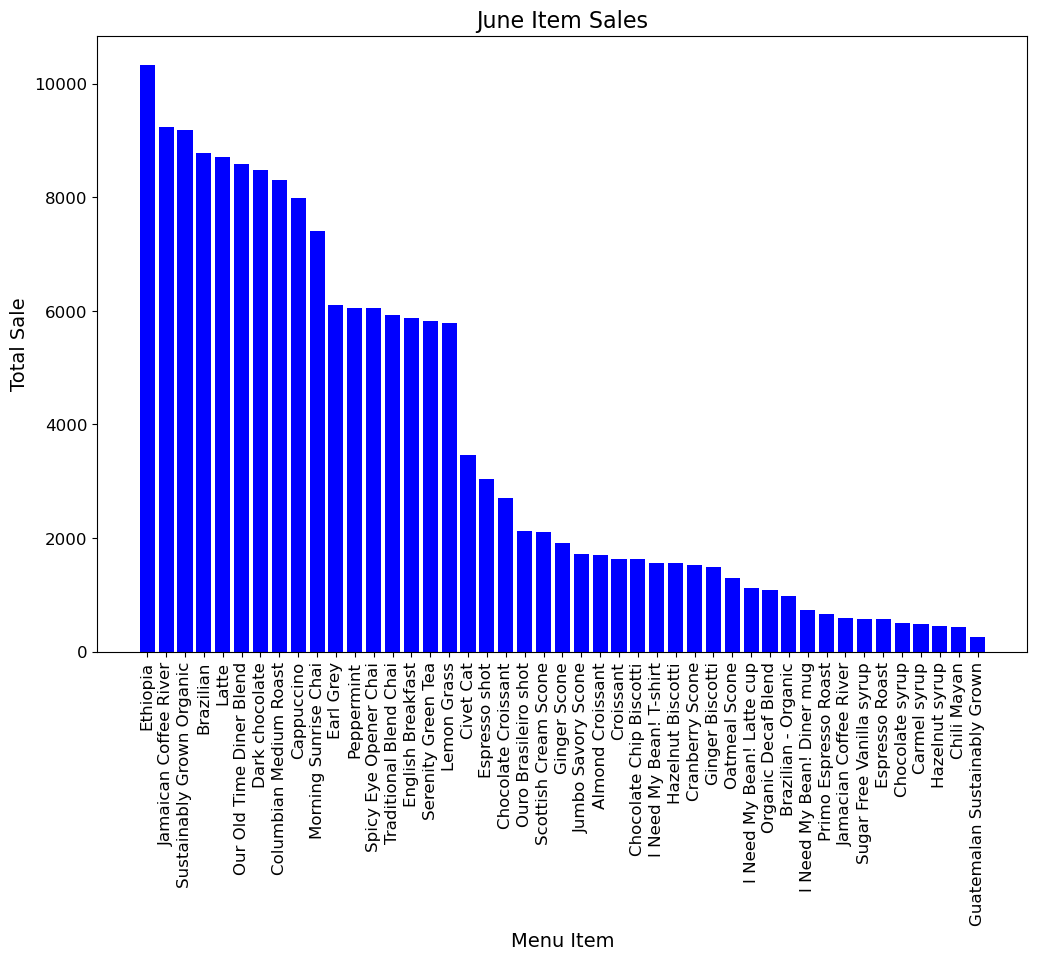

In [64]:
#Plot graph from table popular item menu in june
plt.figure(figsize=(12, 8))
plt.bar(june_trends['product_detail'], june_trends['total_profit'], color='blue')

plt.title('June Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

#### b. Trends by day

In [6]:
#Popular item menu in monday
query_monday = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE day_name IN ('Monday')
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [8]:
#Read sql code for monday filter
monday_trends = pd.read_sql_query(query_monday, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_21392\3075462421.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  monday_trends = pd.read_sql_query(query_monday, pga_coffeshop)


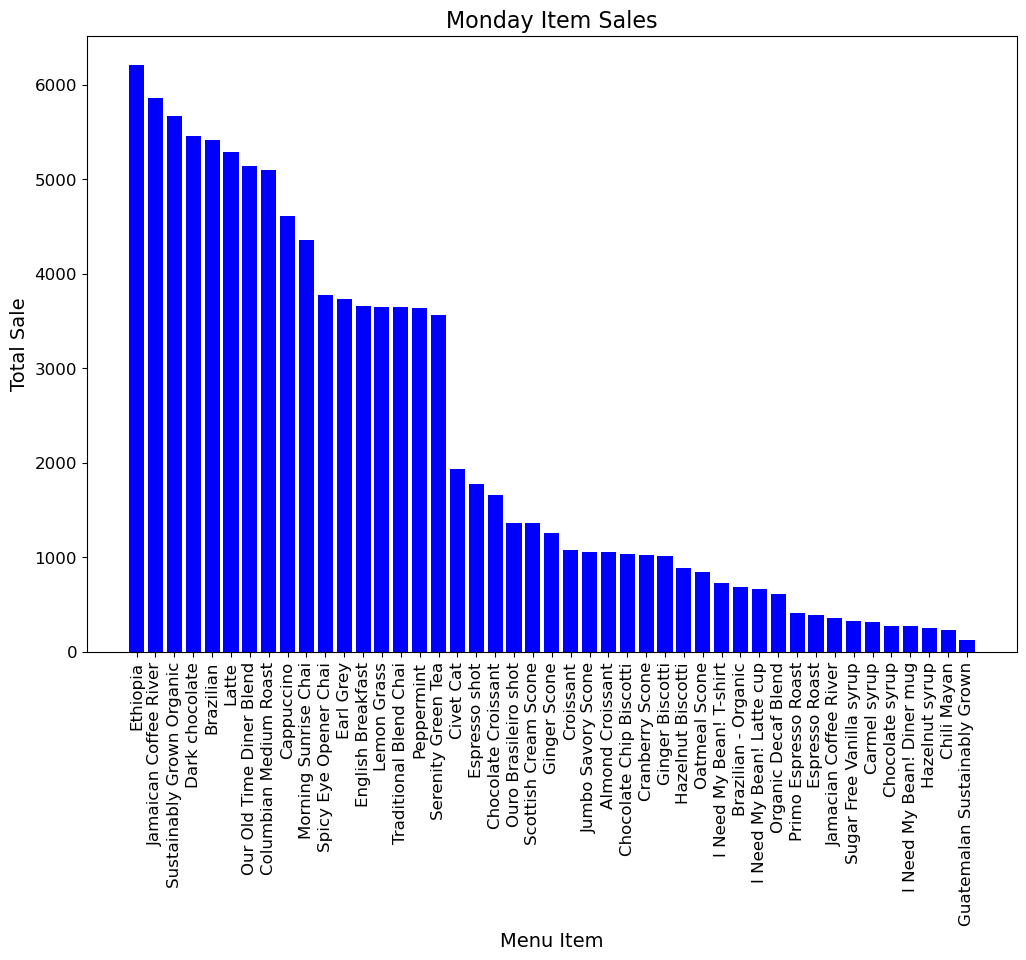

In [67]:
#Plot graph from table popular item menu in monday
plt.figure(figsize=(12, 8))
plt.bar(monday_trends['product_detail'], monday_trends['total_profit'], color='blue')

plt.title('Monday Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [68]:
#Popular item menu in tuesday
query_tuesday = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE day_name IN ('Tuesday')
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [69]:
#Read sql code for tuesday filter
tuesday_trends = pd.read_sql_query(query_tuesday, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\1743690467.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tuesday_trends = pd.read_sql_query(query_tuesday, pga_coffeshop)


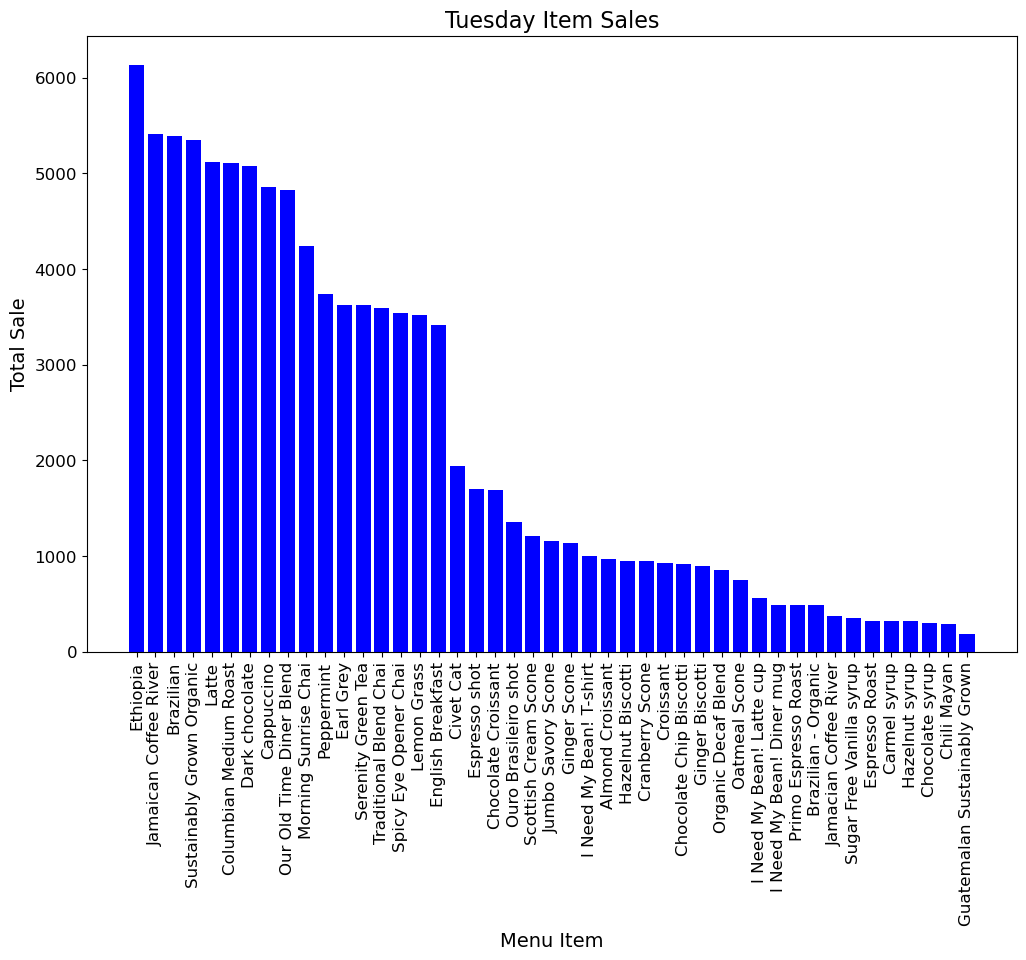

In [70]:
#Plot graph from table popular item menu in tuesday
plt.figure(figsize=(12, 8))
plt.bar(tuesday_trends['product_detail'], tuesday_trends['total_profit'], color='blue')

plt.title('Tuesday Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [71]:
#Popular item menu in wednesday
query_wednesday = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE day_name IN ('Wednesday')
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [72]:
#Read sql code for wednesday filter
wednesday_trends = pd.read_sql_query(query_wednesday, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\3304511906.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  wednesday_trends = pd.read_sql_query(query_wednesday, pga_coffeshop)


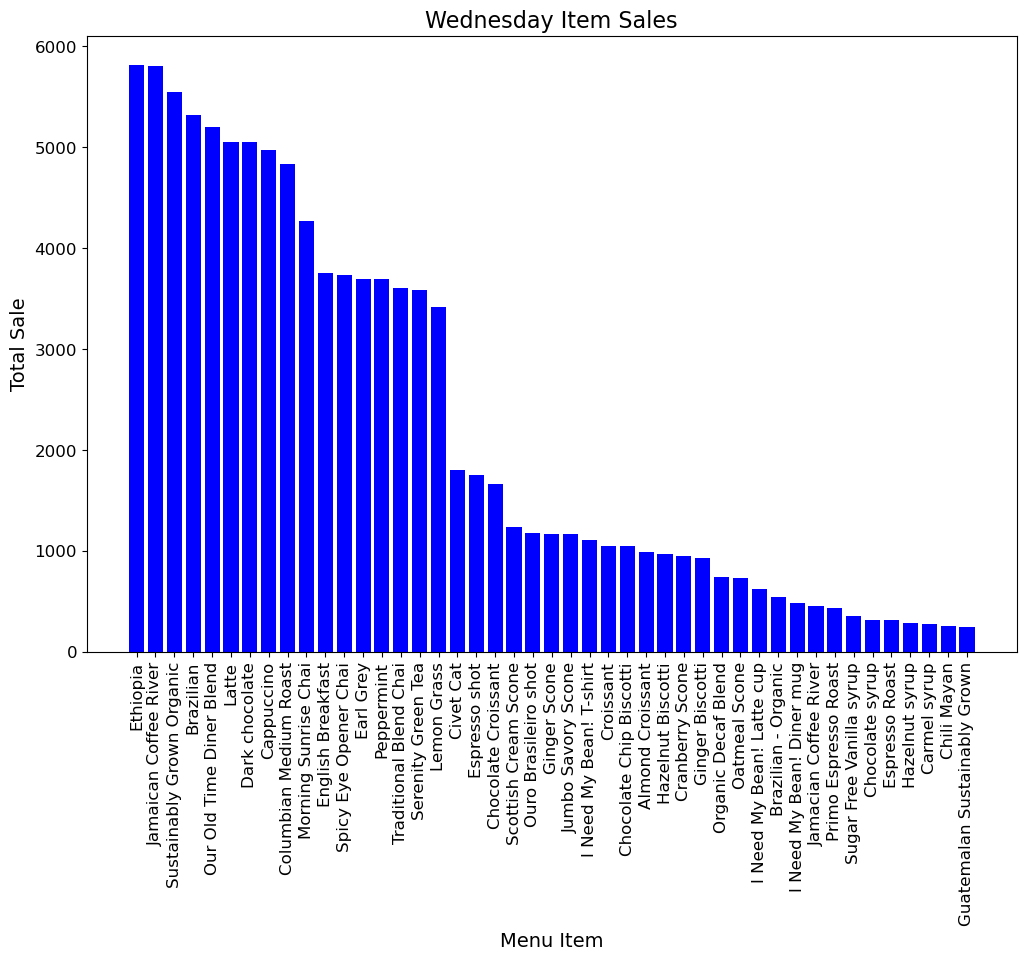

In [73]:
#Plot graph from table popular item menu in wednesday
plt.figure(figsize=(12, 8))
plt.bar(wednesday_trends['product_detail'], wednesday_trends['total_profit'], color='blue')

plt.title('Wednesday Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [74]:
#Popular item menu in thursday
query_thursday = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE day_name IN ('Thursday')
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [75]:
#Read sql code for thursday filter
thursday_trends = pd.read_sql_query(query_thursday, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\1645306937.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  thursday_trends = pd.read_sql_query(query_thursday, pga_coffeshop)


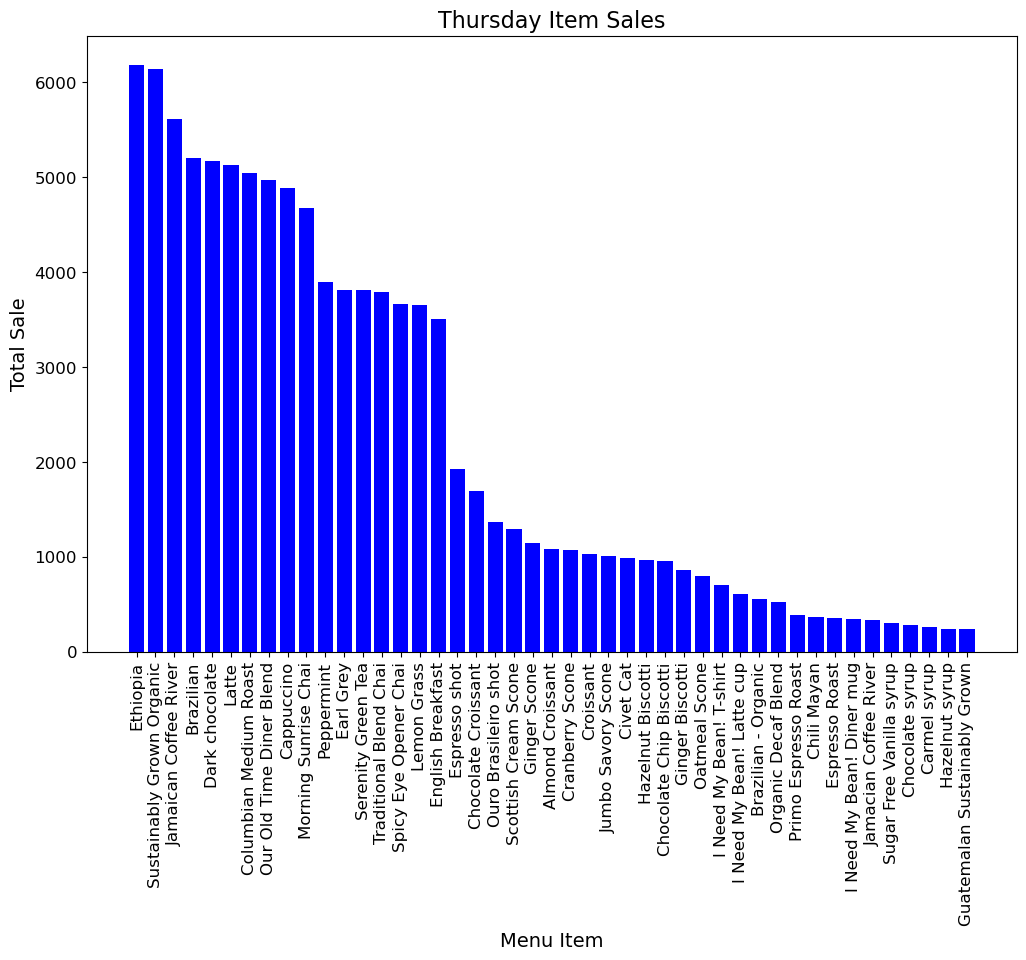

In [76]:
#Plot graph from table popular item menu in thursday
plt.figure(figsize=(12, 8))
plt.bar(thursday_trends['product_detail'], thursday_trends['total_profit'], color='blue')

plt.title('Thursday Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [77]:
#Popular item menu in friday
query_friday = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE day_name IN ('Friday')
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [78]:
#Read sql code for friday filter
friday_trends = pd.read_sql_query(query_friday, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\389561128.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  friday_trends = pd.read_sql_query(query_friday, pga_coffeshop)


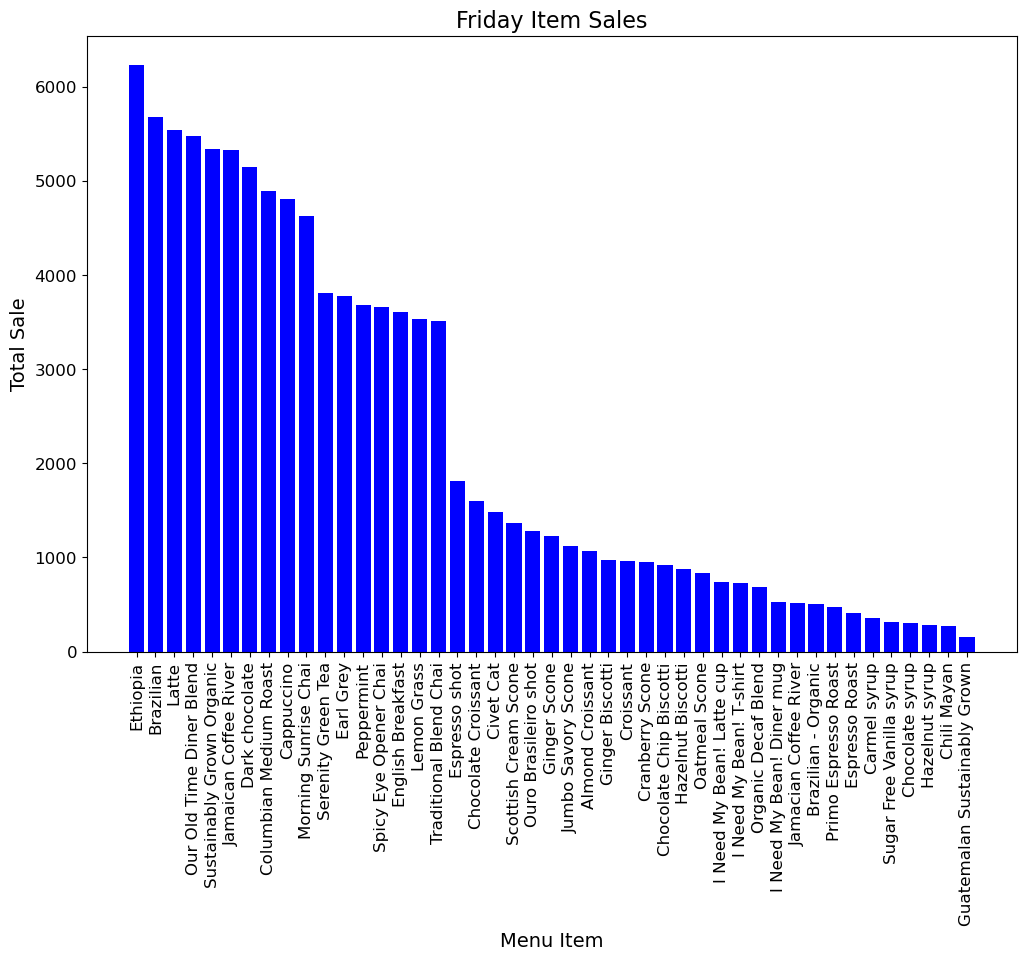

In [79]:
#Plot graph from table popular item menu in friday
plt.figure(figsize=(12, 8))
plt.bar(friday_trends['product_detail'], friday_trends['total_profit'], color='blue')

plt.title('Friday Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [80]:
#Popular item menu in saturday
query_saturday = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE day_name IN ('Saturday')
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [81]:
#Read sql code for saturday filter
saturday_trends = pd.read_sql_query(query_saturday, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\2001153849.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  saturday_trends = pd.read_sql_query(query_saturday, pga_coffeshop)


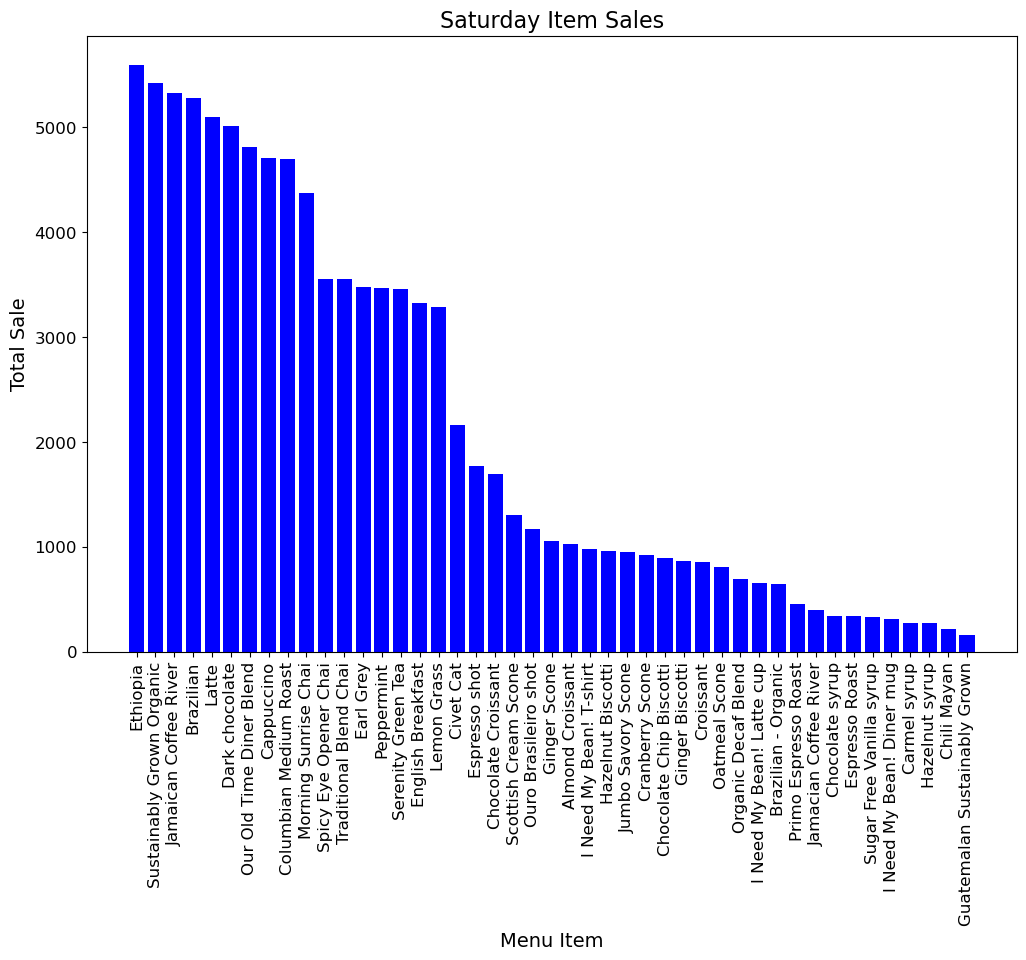

In [82]:
#Plot graph from table popular item menu in saturday
plt.figure(figsize=(12, 8))
plt.bar(saturday_trends['product_detail'], saturday_trends['total_profit'], color='blue')

plt.title('Saturday Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [83]:
#Popular item menu in sunday
query_sunday = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE day_name IN ('Sunday')
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [84]:
#Read sql code for sunday filter
sunday_trends = pd.read_sql_query(query_sunday, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\658630782.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sunday_trends = pd.read_sql_query(query_sunday, pga_coffeshop)


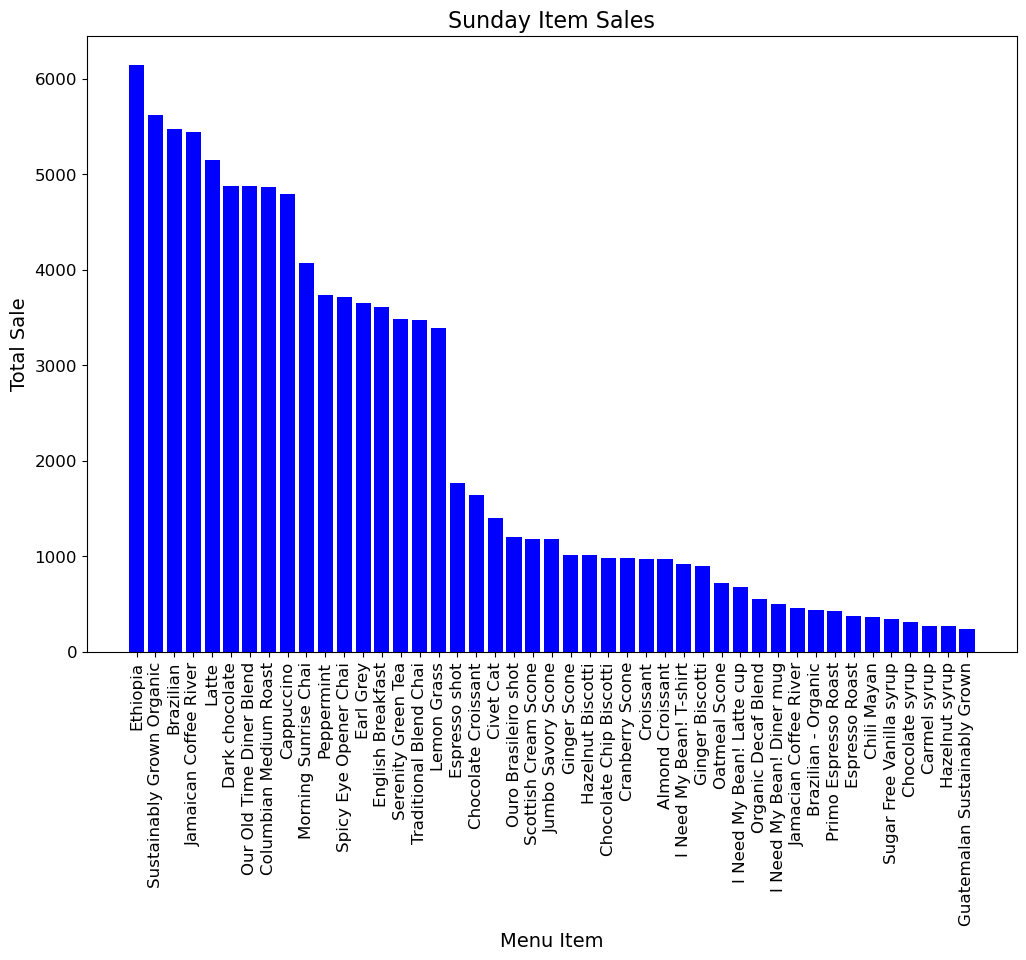

In [85]:
#Plot graph from table popular item menu in sunday
plt.figure(figsize=(12, 8))
plt.bar(sunday_trends['product_detail'], sunday_trends['total_profit'], color='blue')

plt.title('Sunday Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

#### c. Trends by time

In [86]:
#Popular item menu in 6
query_six = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE hour IN (6)
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [87]:
#Read sql code for six filter
six_trends = pd.read_sql_query(query_six, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\2191370885.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  six_trends = pd.read_sql_query(query_six, pga_coffeshop)


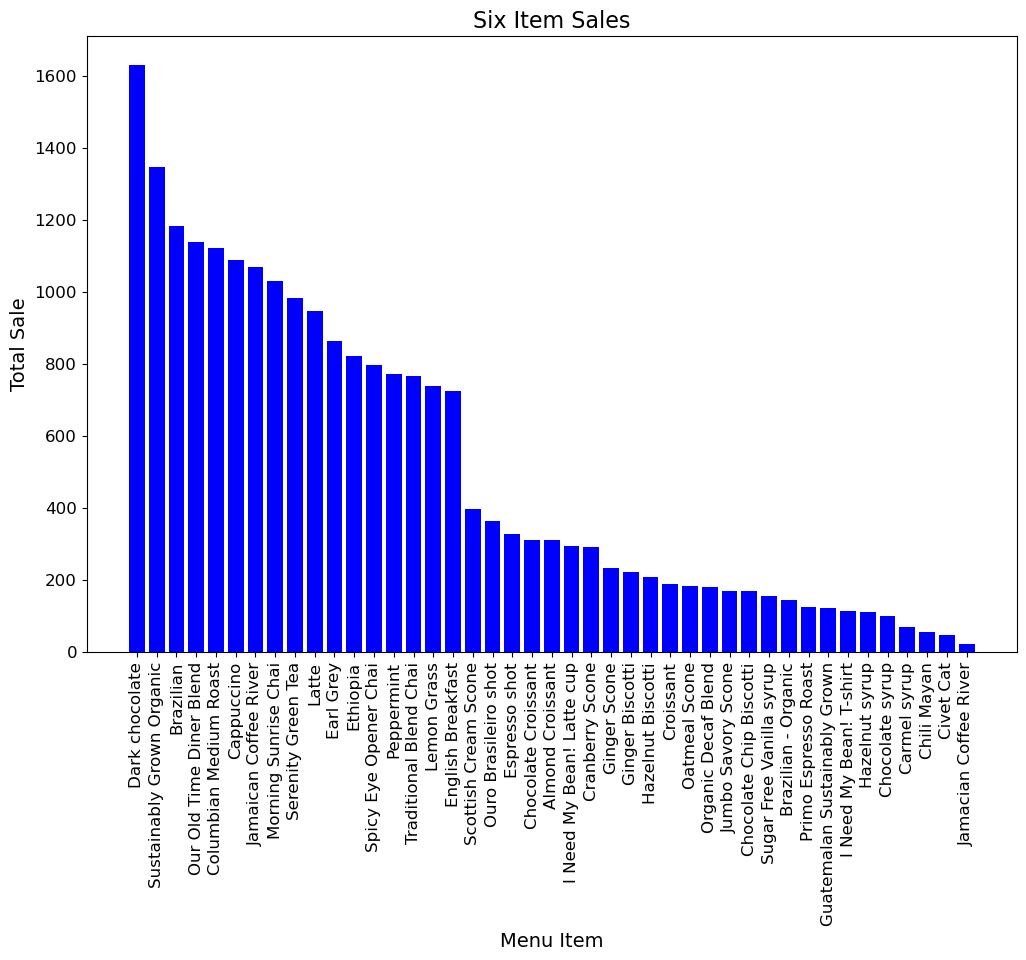

In [88]:
#Plot graph from table popular item menu in six 
plt.figure(figsize=(12, 8))
plt.bar(six_trends['product_detail'], six_trends['total_profit'], color='blue')

plt.title('Six Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [89]:
#Popular item menu in 7
query_seven = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE hour IN (7)
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [90]:
#Read sql code for seven filter
seven_trends = pd.read_sql_query(query_seven, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\3650597955.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  seven_trends = pd.read_sql_query(query_seven, pga_coffeshop)


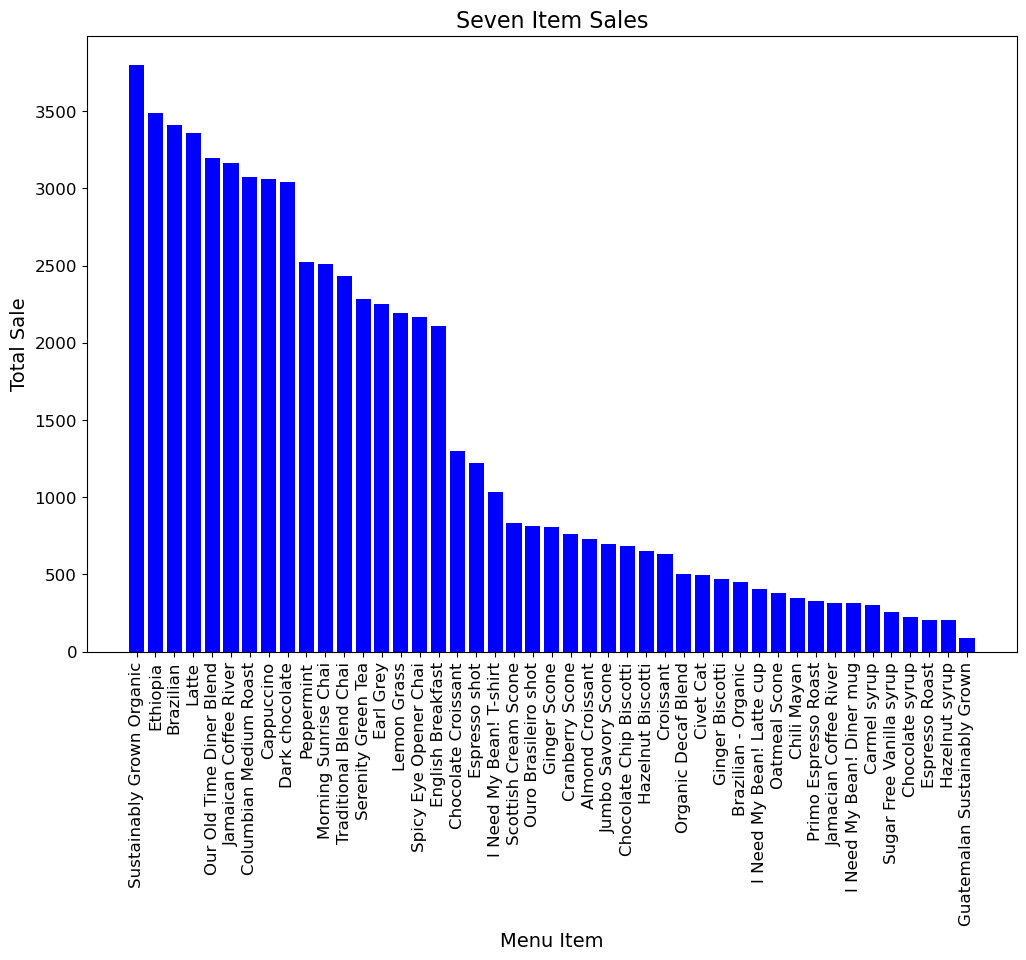

In [91]:
#Plot graph from table popular item menu in seven
plt.figure(figsize=(12, 8))
plt.bar(seven_trends['product_detail'], seven_trends['total_profit'], color='blue')

plt.title('Seven Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [92]:
#Popular item menu in 8
query_eight = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE hour IN (8)
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [93]:
#Read sql code for eight filter
eight_trends = pd.read_sql_query(query_eight, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\655862744.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  eight_trends = pd.read_sql_query(query_eight, pga_coffeshop)


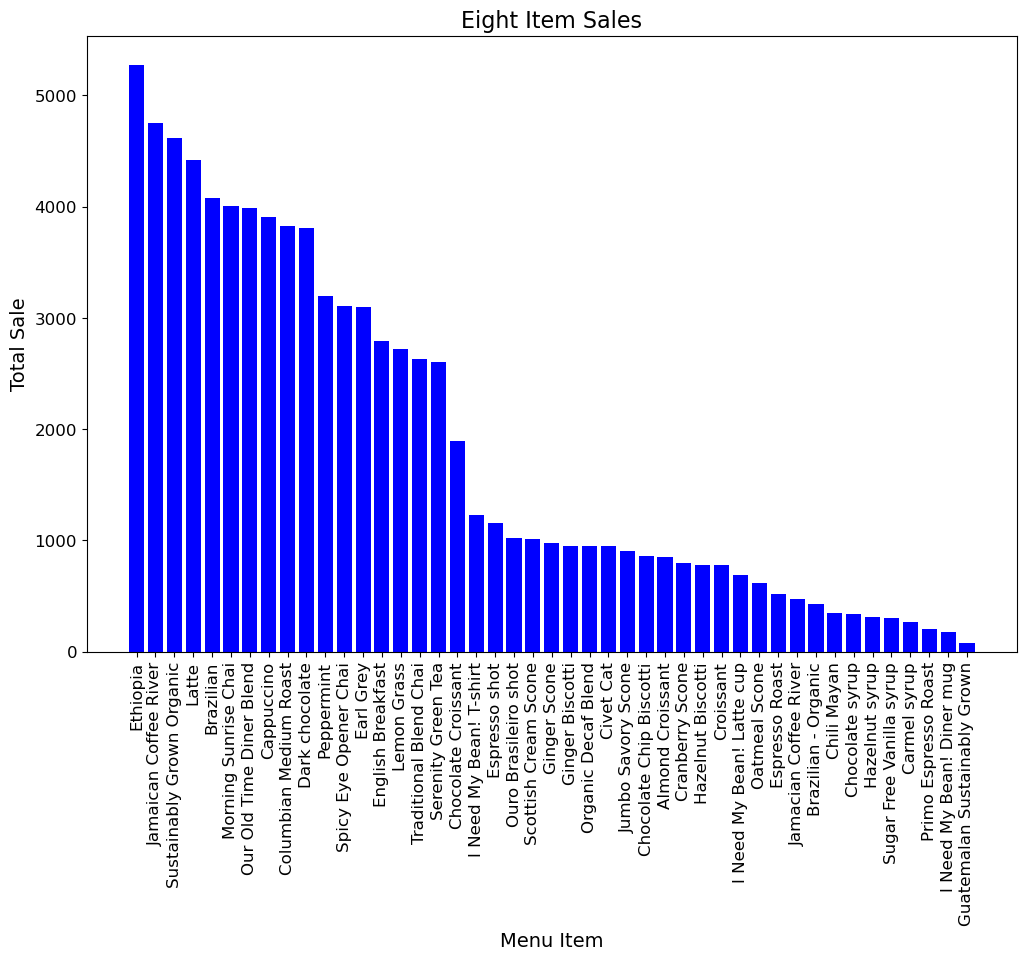

In [94]:
#Plot graph from table popular item menu in eight
plt.figure(figsize=(12, 8))
plt.bar(eight_trends['product_detail'], eight_trends['total_profit'], color='blue')

plt.title('Eight Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [96]:
#Popular item menu in 9
query_nine = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE hour IN (9)
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [97]:
#Read sql code for nine filter
nine_trends = pd.read_sql_query(query_nine, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\1986868068.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  nine_trends = pd.read_sql_query(query_nine, pga_coffeshop)


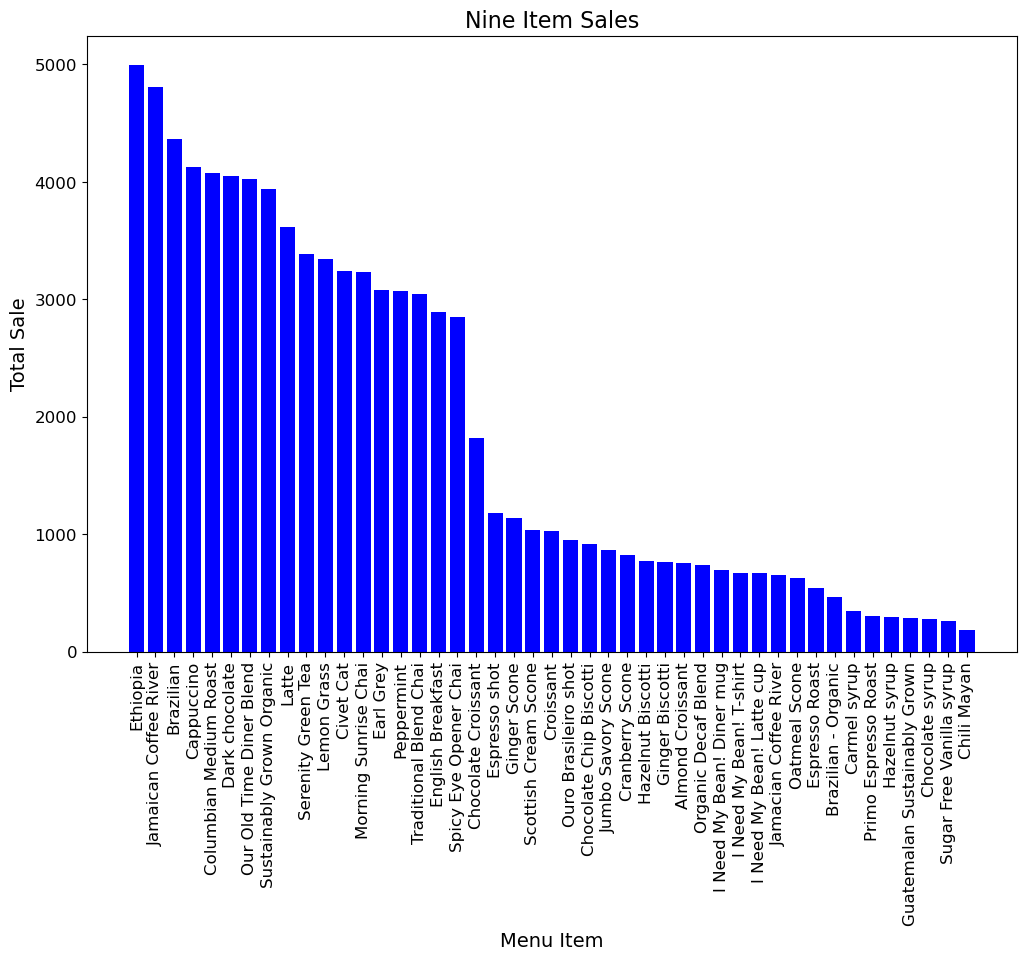

In [98]:
#Plot graph from table popular item menu in nine
plt.figure(figsize=(12, 8))
plt.bar(nine_trends['product_detail'], nine_trends['total_profit'], color='blue')

plt.title('Nine Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [99]:
#Popular item menu in 10
query_ten = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE hour IN (10)
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [100]:
#Read sql code for ten filter
ten_trends = pd.read_sql_query(query_ten, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\2862057697.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ten_trends = pd.read_sql_query(query_ten, pga_coffeshop)


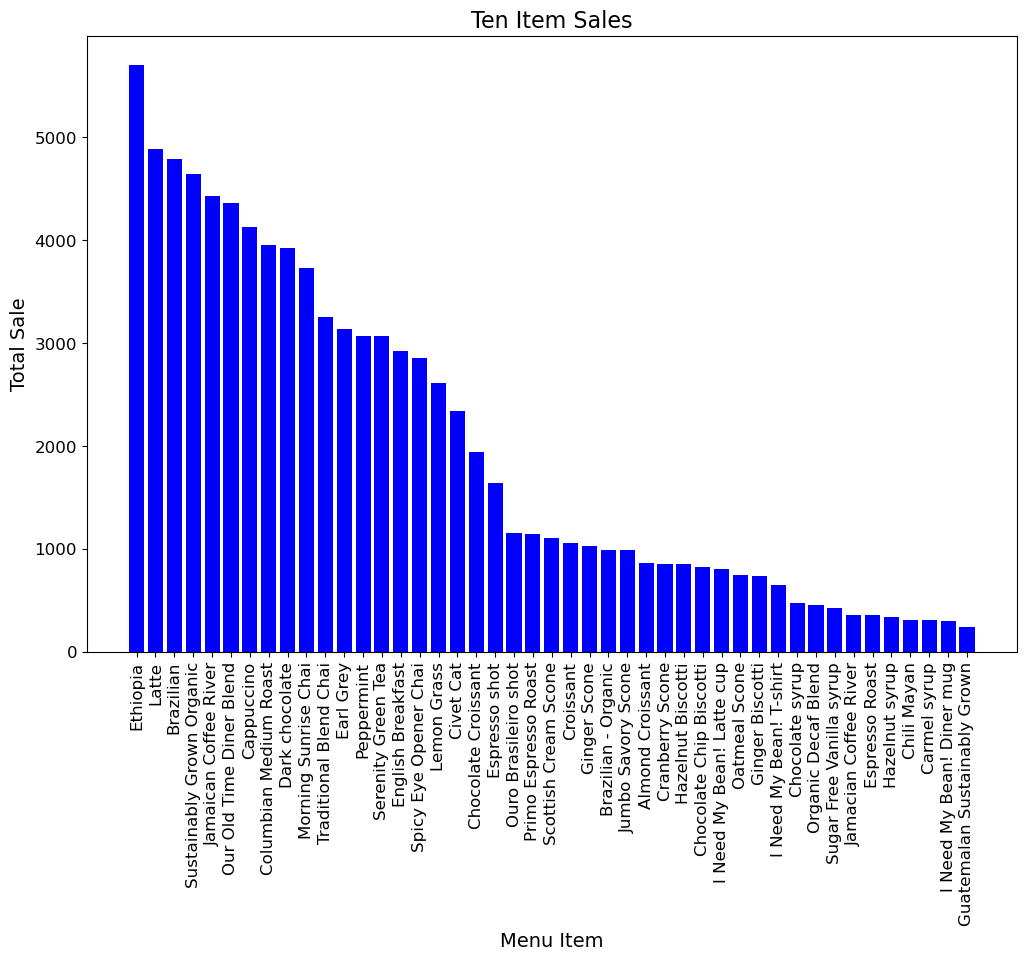

In [101]:
#Plot graph from table popular item menu in ten
plt.figure(figsize=(12, 8))
plt.bar(ten_trends['product_detail'], ten_trends['total_profit'], color='blue')

plt.title('Ten Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [102]:
#Popular item menu in 11
query_eleven = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE hour IN (11)
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [103]:
#Read sql code for eleven filter
eleven_trends = pd.read_sql_query(query_eleven, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\1403211684.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  eleven_trends = pd.read_sql_query(query_eleven, pga_coffeshop)


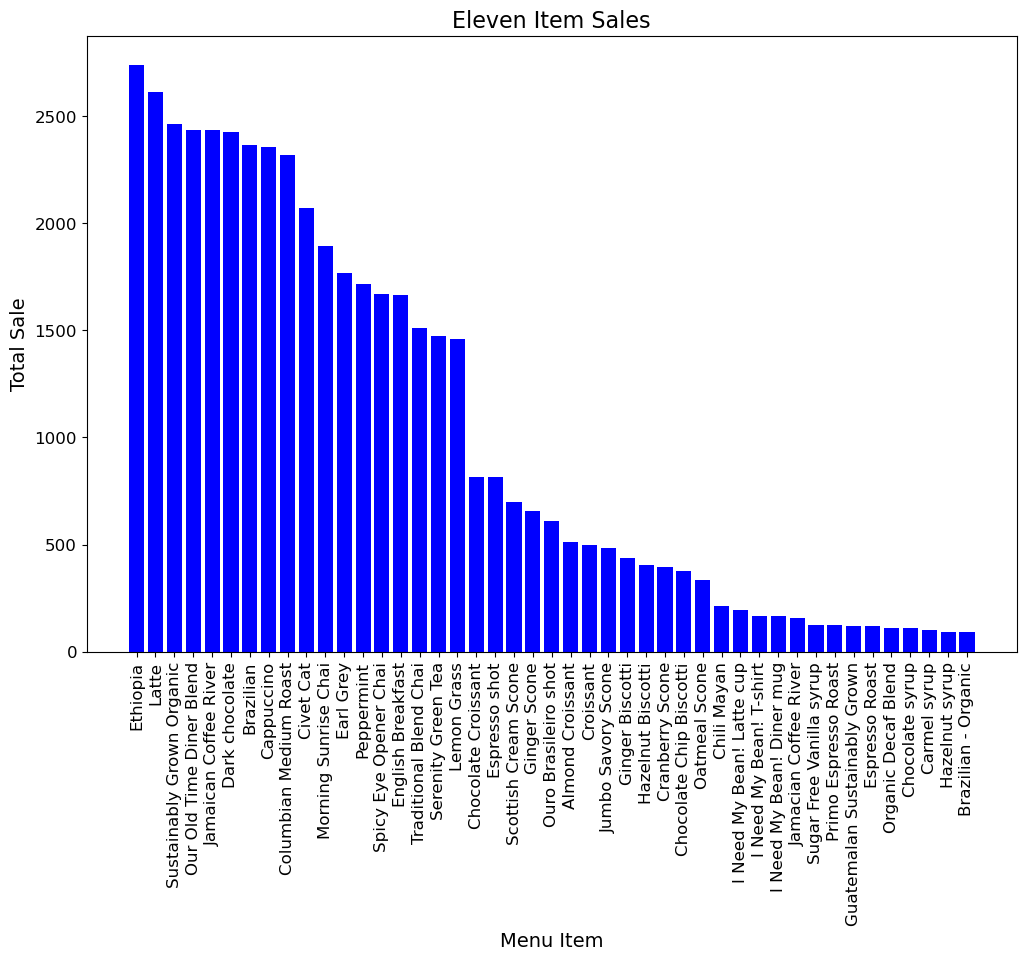

In [104]:
#Plot graph from table popular item menu in eleven
plt.figure(figsize=(12, 8))
plt.bar(eleven_trends['product_detail'], eleven_trends['total_profit'], color='blue')

plt.title('Eleven Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [105]:
#Popular item menu in 12
query_twelve = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE hour IN (12)
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [106]:
#Read sql code for twelve filter
twelve_trends = pd.read_sql_query(query_twelve, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\2929766325.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  twelve_trends = pd.read_sql_query(query_twelve, pga_coffeshop)


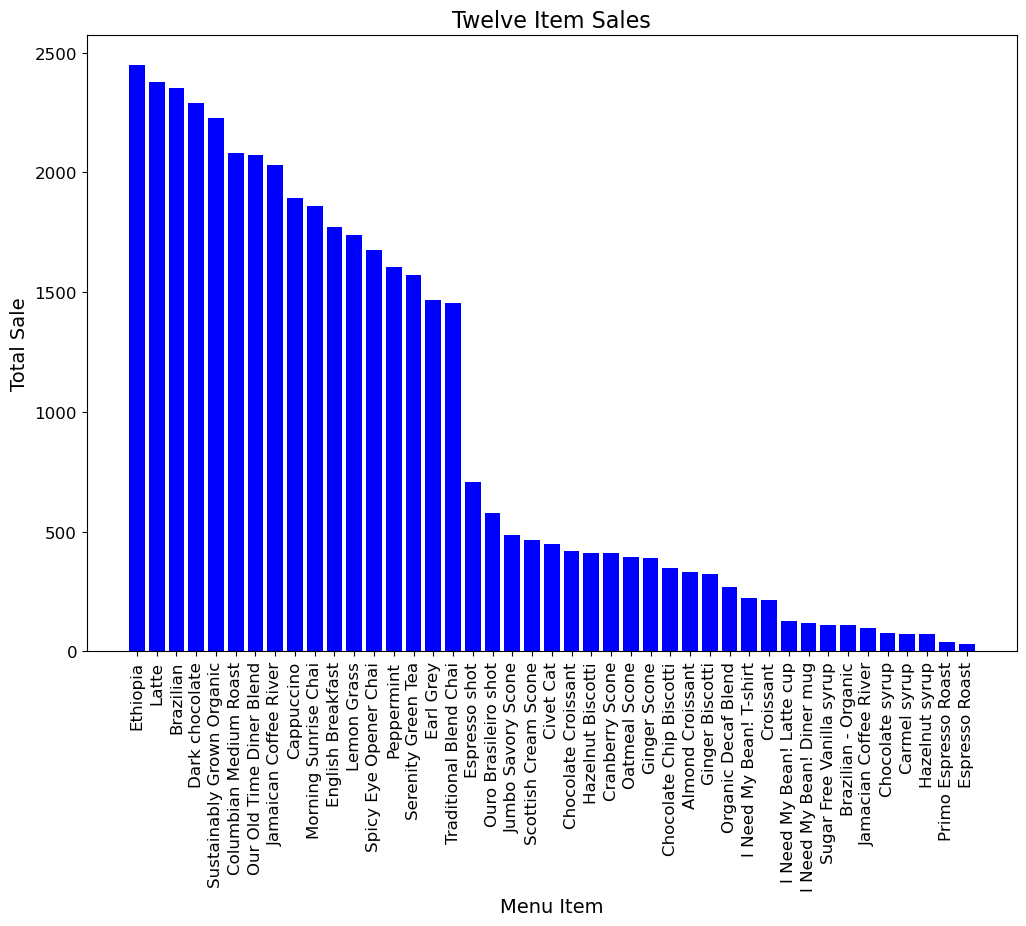

In [107]:
#Plot graph from table popular item menu in twelve
plt.figure(figsize=(12, 8))
plt.bar(twelve_trends['product_detail'], twelve_trends['total_profit'], color='blue')

plt.title('Twelve Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [108]:
#Popular item menu in 13
query_thirteen = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE hour IN (13)
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [109]:
#Read sql code for thirteen filter
thirteen_trends = pd.read_sql_query(query_thirteen, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\3987381113.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  thirteen_trends = pd.read_sql_query(query_thirteen, pga_coffeshop)


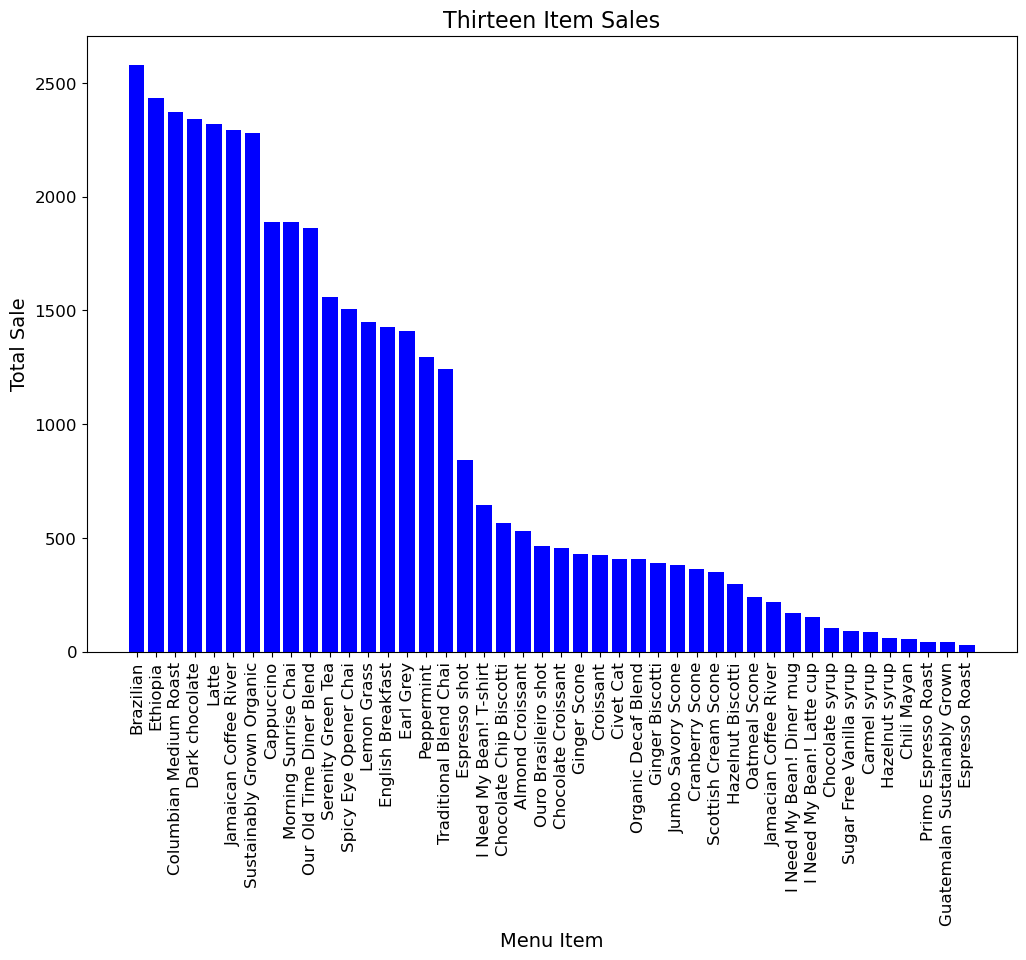

In [110]:
#Plot graph from table popular item menu in thirteen
plt.figure(figsize=(12, 8))
plt.bar(thirteen_trends['product_detail'], thirteen_trends['total_profit'], color='blue')

plt.title('Thirteen Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [111]:
#Popular item menu in 14
query_fourteen = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE hour IN (14)
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [112]:
#Read sql code for fourteen filter
fourteen_trends = pd.read_sql_query(query_fourteen, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\135007755.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fourteen_trends = pd.read_sql_query(query_fourteen, pga_coffeshop)


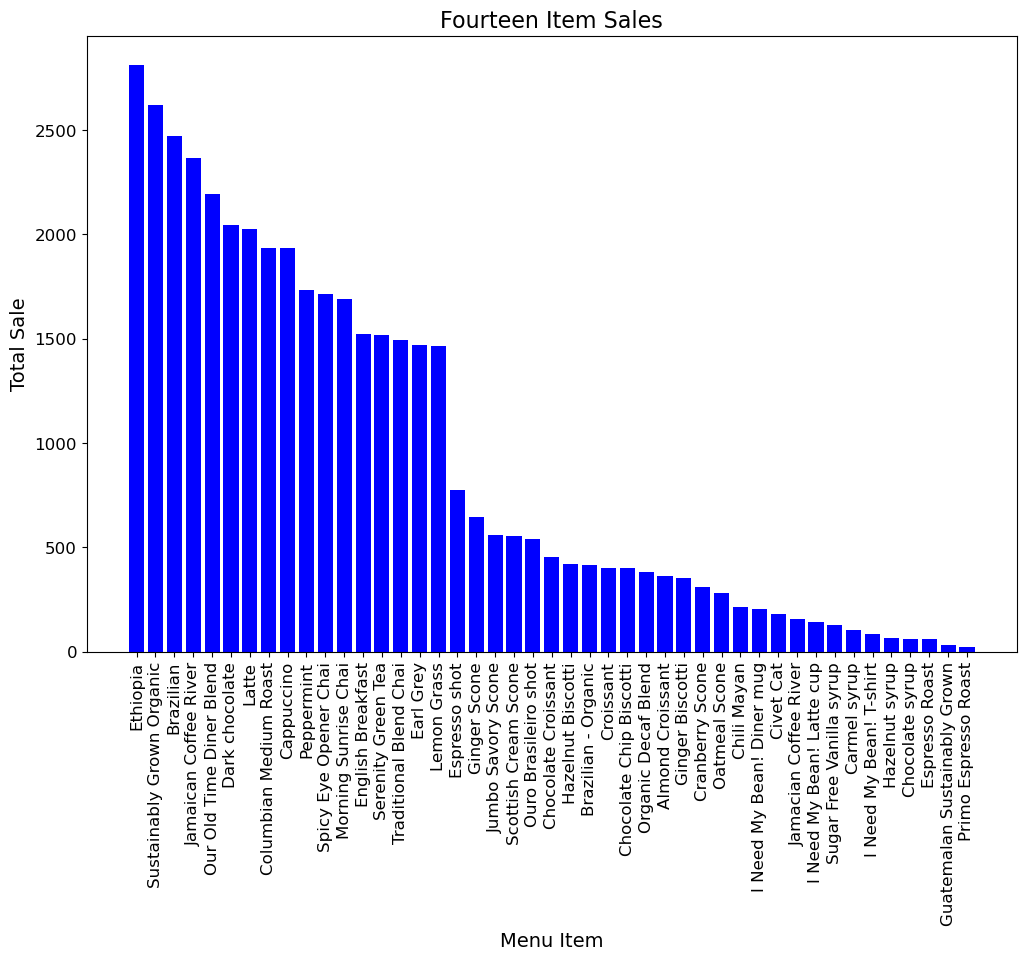

In [113]:
#Plot graph from table popular item menu in fourteen
plt.figure(figsize=(12, 8))
plt.bar(fourteen_trends['product_detail'], fourteen_trends['total_profit'], color='blue')

plt.title('Fourteen Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [114]:
#Popular item menu in 15
query_fiveteen = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE hour IN (15)
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [115]:
#Read sql code for fiveteen filter
fiveteen_trends = pd.read_sql_query(query_fiveteen, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\514787999.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fiveteen_trends = pd.read_sql_query(query_fiveteen, pga_coffeshop)


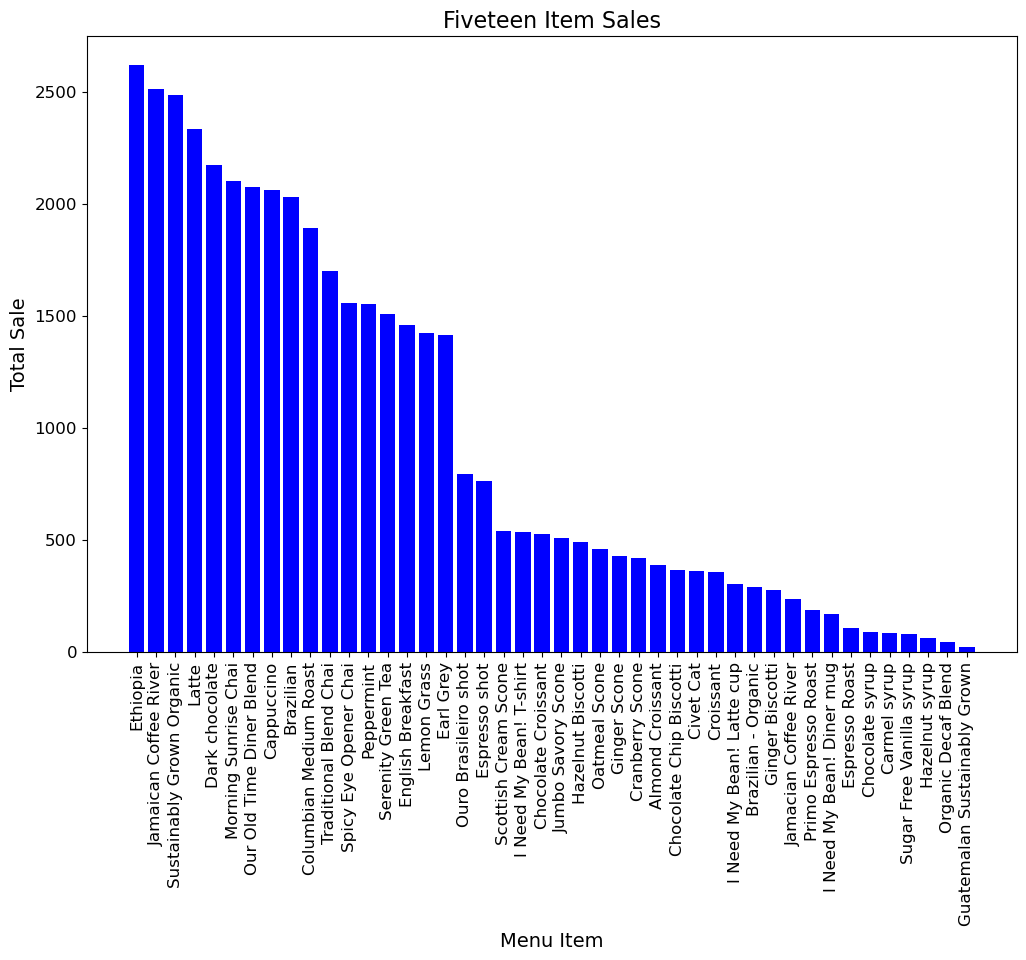

In [116]:
#Plot graph from table popular item menu in fiveteen
plt.figure(figsize=(12, 8))
plt.bar(fiveteen_trends['product_detail'], fiveteen_trends['total_profit'], color='blue')

plt.title('Fiveteen Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [117]:
#Popular item menu in 16
query_sixteen = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE hour IN (16)
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [118]:
#Read sql code for sixteen filter
sixteen_trends = pd.read_sql_query(query_sixteen, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\3027236203.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sixteen_trends = pd.read_sql_query(query_sixteen, pga_coffeshop)


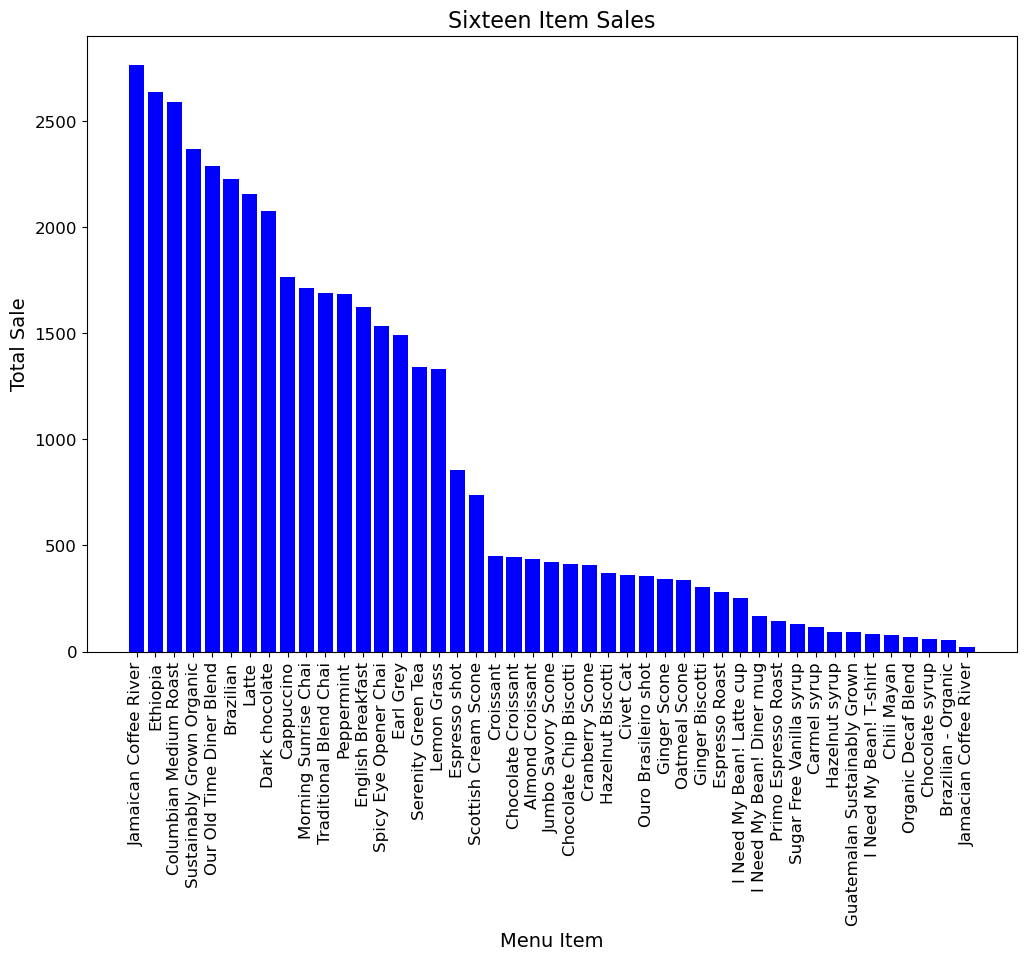

In [119]:
#Plot graph from table popular item menu in sixteen
plt.figure(figsize=(12, 8))
plt.bar(sixteen_trends['product_detail'], sixteen_trends['total_profit'], color='blue')

plt.title('Sixteen Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [120]:
#Popular item menu in 17
query_seventeen = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE hour IN (17)
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [121]:
#Read sql code for seventeen filter
seventeen_trends = pd.read_sql_query(query_seventeen, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\1140548598.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  seventeen_trends = pd.read_sql_query(query_seventeen, pga_coffeshop)


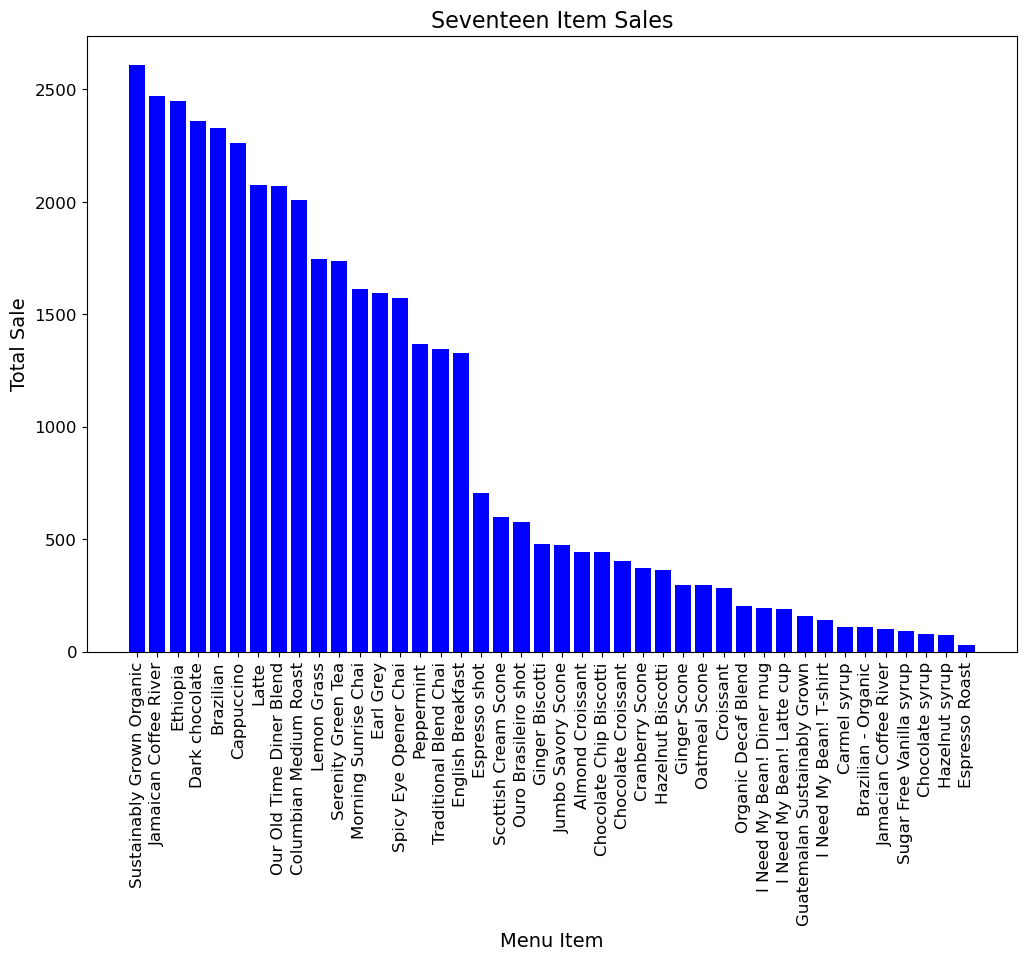

In [122]:
#Plot graph from table popular item menu in seventeen
plt.figure(figsize=(12, 8))
plt.bar(seventeen_trends['product_detail'], seventeen_trends['total_profit'], color='blue')

plt.title('Seventeen Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [123]:
#Popular item menu in 18
query_eighteen = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE hour IN (18)
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [124]:
#Read sql code for eighteen filter
eighteen_trends = pd.read_sql_query(query_eighteen, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\1526803039.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  eighteen_trends = pd.read_sql_query(query_eighteen, pga_coffeshop)


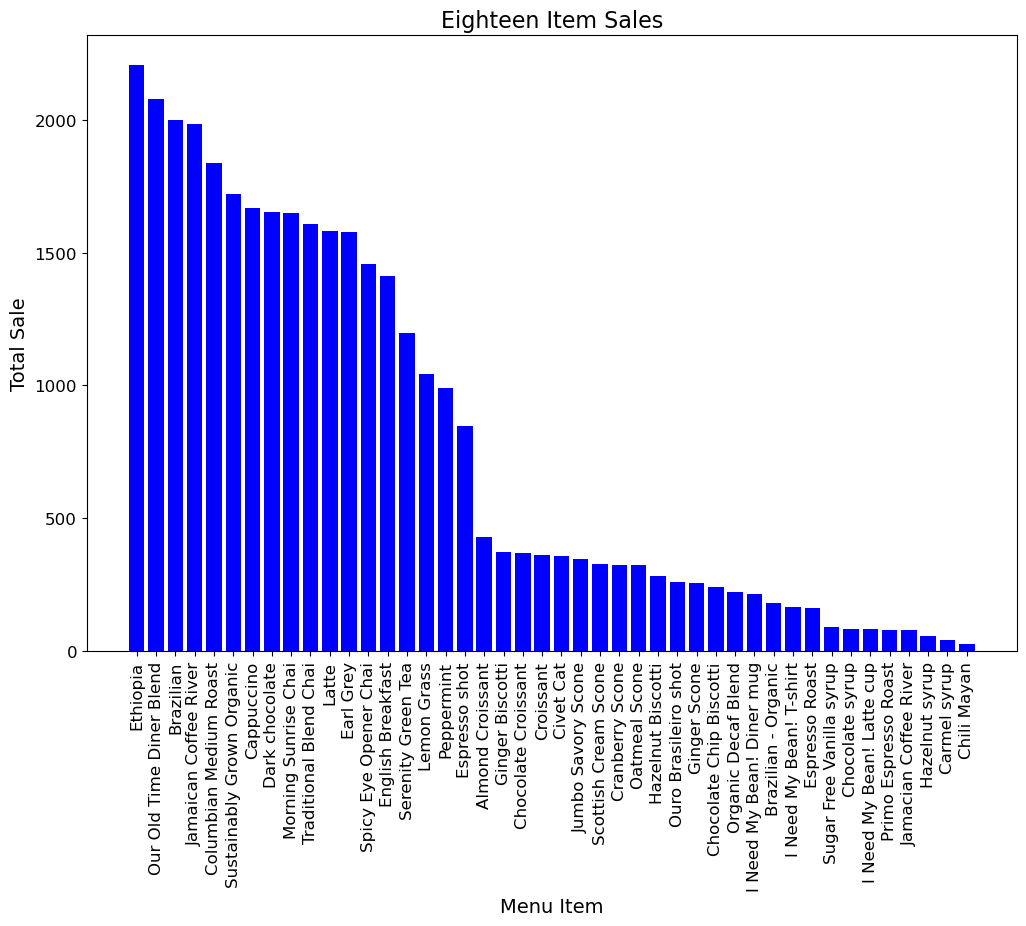

In [125]:
#Plot graph from table popular item menu in eighteen
plt.figure(figsize=(12, 8))
plt.bar(eighteen_trends['product_detail'], eighteen_trends['total_profit'], color='blue')

plt.title('Eighteen Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [126]:
#Popular item menu in 19
query_nineteen = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE hour IN (19)
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [127]:
#Read sql code for nineteen filter
nineteen_trends = pd.read_sql_query(query_nineteen, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\1054117104.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  nineteen_trends = pd.read_sql_query(query_nineteen, pga_coffeshop)


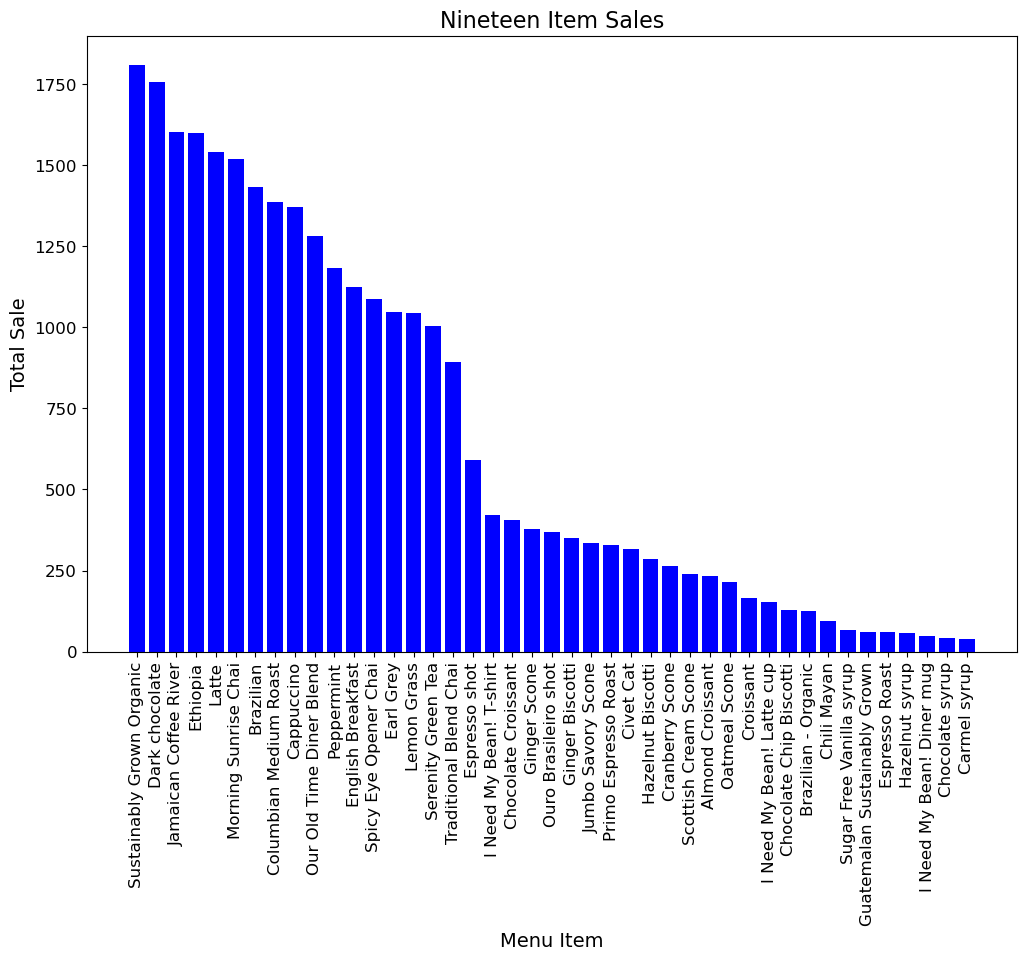

In [128]:
#Plot graph from table popular item menu in nineteen
plt.figure(figsize=(12, 8))
plt.bar(nineteen_trends['product_detail'], nineteen_trends['total_profit'], color='blue')

plt.title('Nineteen Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [129]:
#Popular item menu in 20
query_twenty = """SELECT product_detail, SUM (total_bill) AS total_profit
FROM coffeshop_product
JOIN coffeshope_timedetail
ON coffeshop_product.product_trans_id = coffeshope_timedetail.timedetail_id
WHERE hour IN (20)
GROUP BY product_detail
ORDER BY total_profit DESC;"""

In [130]:
#Read sql code for twenty filter
twenty_trends = pd.read_sql_query(query_twenty, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\3611393923.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  twenty_trends = pd.read_sql_query(query_twenty, pga_coffeshop)


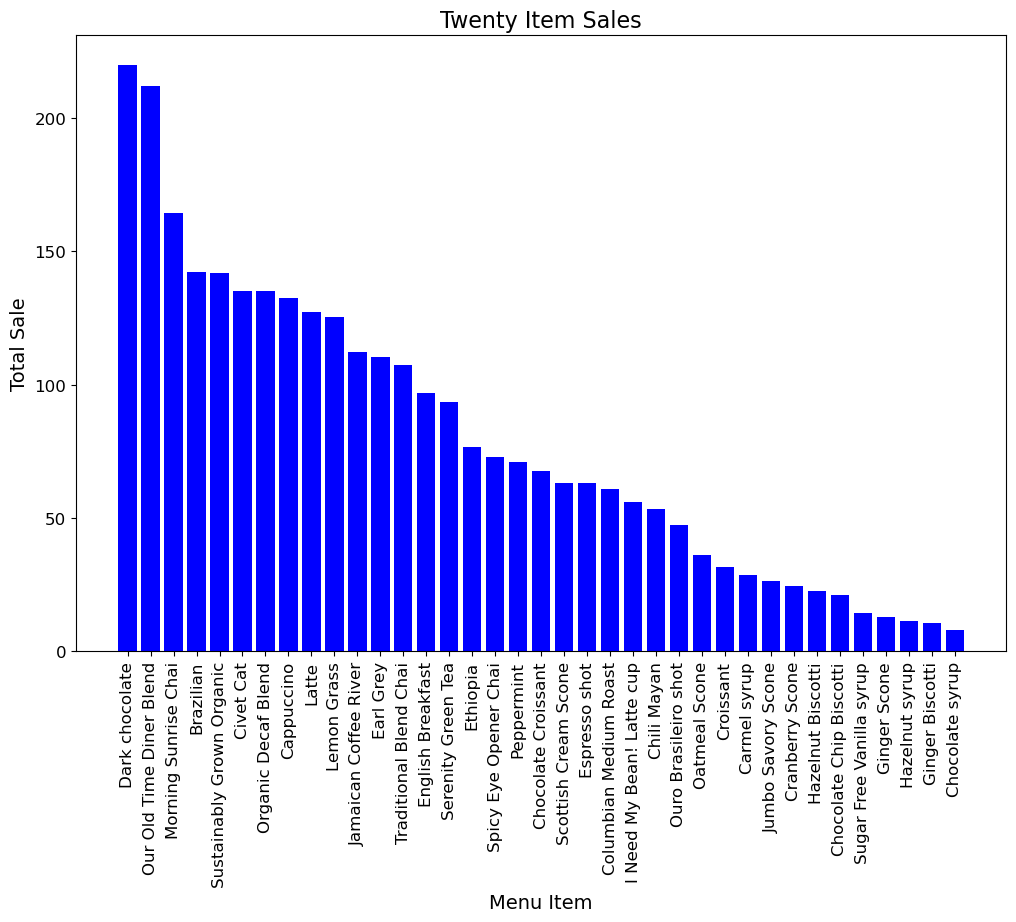

In [131]:
#Plot graph from table popular item menu in twenty
plt.figure(figsize=(12, 8))
plt.bar(twenty_trends['product_detail'], twenty_trends['total_profit'], color='blue')

plt.title('Twenty Item Sales', fontsize=16)
plt.xlabel('Menu Item', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### 3. Store trends

In [136]:
#Popular store
query_store = """SELECT store_location, SUM(CAST(total_bill AS NUMERIC)) AS total_profit
FROM coffeshop_product
JOIN coffeshop_transaction ON coffeshop_product.product_trans_id = coffeshop_transaction.transaction_id
WHERE store_location IN ('Astoria', 'Hell''s Kitchen', 'Lower Manhattan')
GROUP BY store_location
ORDER BY total_profit DESC;"""

In [137]:
#Read sql code for store filter
store_trends = pd.read_sql_query(query_store, pga_coffeshop)

C:\Users\User\AppData\Local\Temp\ipykernel_18476\2577334610.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  store_trends = pd.read_sql_query(query_store, pga_coffeshop)


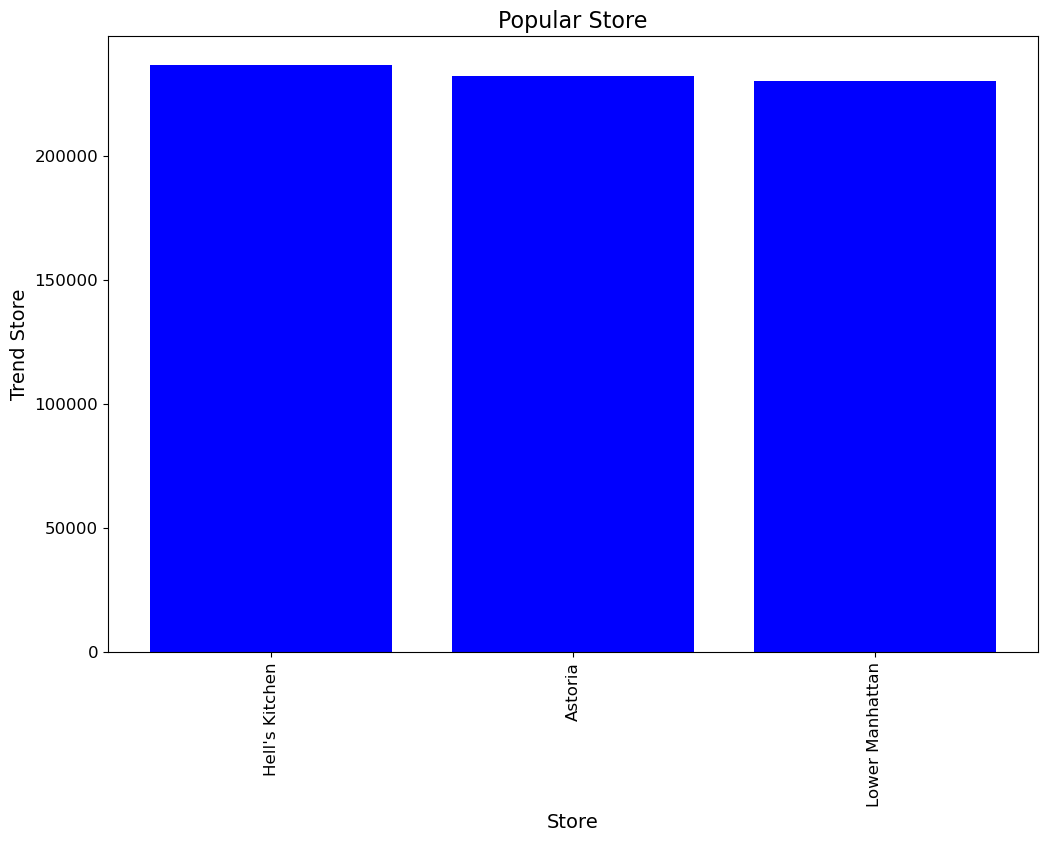

In [138]:
#Plot graph from table popular item menu based on store location
plt.figure(figsize=(12, 8))
plt.bar(store_trends['store_location'], store_trends['total_profit'], color='blue')

plt.title('Popular Store', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Trend Store', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# Analysis

Based on this information, we can identify several significant customer habits:

1. Beverage Preference: Customers prefer drinks from the Coffee category, particularly the Ethiopian variant, which is the most popular and profitable.

2. Food Choices: Customers' top food choice is chocolate croissants, indicating that this snack is popular and can significantly increase profits. It is clear that the Croissant trend on social media, followed by social media promotions, can encourage sales trends.

3. Monthly Purchase Patterns: Profits on the beverage menu increase in June, possibly due to seasonal factors or promotions. The increase in profits in June in sales data was attributed to the summer holiday season, which occurs frequently in that month.

4. Day and Time Preference: Customers prefer to make purchases on Mondays and at 10 a.m. This could be influenced by customers' schedules or routines, as they are more likely to buy at the beginning of the week and during lunchtime.

# Conculsion

In this data analysis project, we set out on a journey to extract valuable insights from Coffee Shop sales data. We started by preparing and exploring the dataset, cleaning up any missing or null values, and developing new features to help us find meaningful patterns.

We answered a wide range of questions, from understanding product performance and sales trends to delving into customer behavior. These findings are critical for Coffee Shop sales strategies and can inform future optimizations.